## Import library

https://www.info-radiologie.ch/classification-mammographie.php

https://www.mammoscreen.com
explication mamo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 2.x
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0'

## Import/Read Dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Info.txt",delimiter=" ")
df = df.iloc[:,:-1]
df.head(10)

REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0  mdb001  G  CIRC        B  535.0  425.0   197.0
1  mdb002  G  CIRC        B  522.0  280.0    69.0
2  mdb003  D  NORM      NaN    NaN    NaN     NaN
3  mdb004  D  NORM      NaN    NaN    NaN     NaN
4  mdb005  F  CIRC        B  477.0  133.0    30.0
5  mdb005  F  CIRC        B  500.0  168.0    26.0
6  mdb006  F  NORM      NaN    NaN    NaN     NaN
7  mdb007  G  NORM      NaN    NaN    NaN     NaN
8  mdb008  G  NORM      NaN    NaN    NaN     NaN
9  mdb009  F  NORM      NaN    NaN    NaN     NaN

In [ ]:
df["path"] = df["REFNUM"].map(lambda x: '/content/drive/My Drive/mias_jpg/%s.jpg' % x)
df.head(10)

REFNUM BG CLASS  ...      Y  RADIUS                                         path
0  mdb001  G  CIRC  ...  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1  mdb002  G  CIRC  ...  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
2  mdb003  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg
3  mdb004  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg
4  mdb005  F  CIRC  ...  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg
5  mdb005  F  CIRC  ...  168.0    26.0  /content/drive/My Drive/mias_jpg/mdb005.jpg
6  mdb006  F  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb006.jpg
7  mdb007  G  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb007.jpg
8  mdb008  G  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb008.jpg
9  mdb009  F  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb009.jpg

[10 rows x 8 columns]

In [ ]:
df["SEVERITY"]= df["SEVERITY"].fillna("N")
df.head()

REFNUM BG CLASS  ...      Y  RADIUS                                         path
0  mdb001  G  CIRC  ...  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1  mdb002  G  CIRC  ...  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
2  mdb003  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg
3  mdb004  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg
4  mdb005  F  CIRC  ...  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg

[5 rows x 8 columns]

In [ ]:
df["Class_s"]=df["CLASS"]+"-"+df["SEVERITY"]
df.head()

REFNUM BG CLASS  ... RADIUS                                         path  Class_s
0  mdb001  G  CIRC  ...  197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg   CIRC-B
1  mdb002  G  CIRC  ...   69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg   CIRC-B
2  mdb003  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg   NORM-N
3  mdb004  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg   NORM-N
4  mdb005  F  CIRC  ...   30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg   CIRC-B

[5 rows x 9 columns]

In [ ]:
set(df["Class_s"].values)

{'ARCH-B',
 'ARCH-M',
 'ASYM-B',
 'ASYM-M',
 'CALC-B',
 'CALC-M',
 'CIRC-B',
 'CIRC-M',
 'MISC-B',
 'MISC-M',
 'NORM-N',
 'SPIC-B',
 'SPIC-M'}

In [ ]:
#[str(i) for i in df["path"]]
#df["pathlib"] = df["REFNUM"].map(lambda x: '/content/drive/My Drive/mias/%s.jpg' % x)
#df["pathlib"] = ["'"+i+"'" for i in df["path"]]
#df.head()

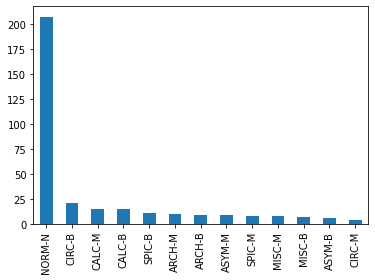

In [ ]:
df["Class_s"].value_counts().plot(kind="bar")

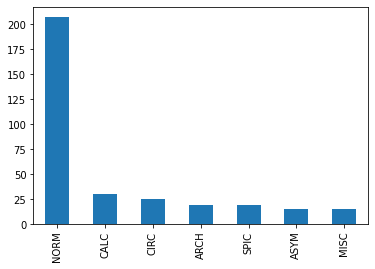

In [ ]:
df["CLASS"].value_counts().plot(kind="bar")

In [ ]:
((df["CLASS"].value_counts()/len(df))*100).round()

NORM    63.0
CALC     9.0
CIRC     8.0
ARCH     6.0
SPIC     6.0
ASYM     5.0
MISC     5.0
Name: CLASS, dtype: float64

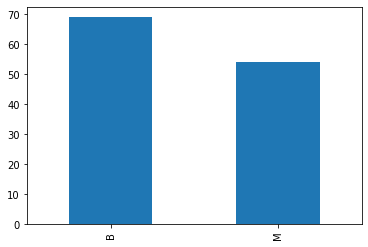

In [ ]:
df["SEVERITY"].value_counts().plot(kind="bar")

### viz Image


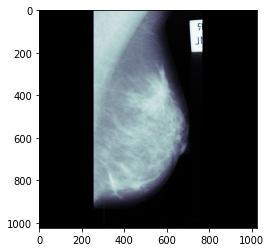

In [ ]:
from PIL import Image
import numpy as np
img = Image.open([i for i in df["path"].values][200])
import matplotlib.pyplot as plt 
plt.imshow(img,cmap="bone")
plt.show()

In [ ]:
first_images=[tf.io.read_file(path) for path in df["path"]][:5]
first_images= tf.image.decode_jpeg(first_images[np.random.randint(5)].numpy(),channels=3)
plt.imshow(first_images)
plt.show()

KeyboardInterrupt: ignored

ValueError: ignored

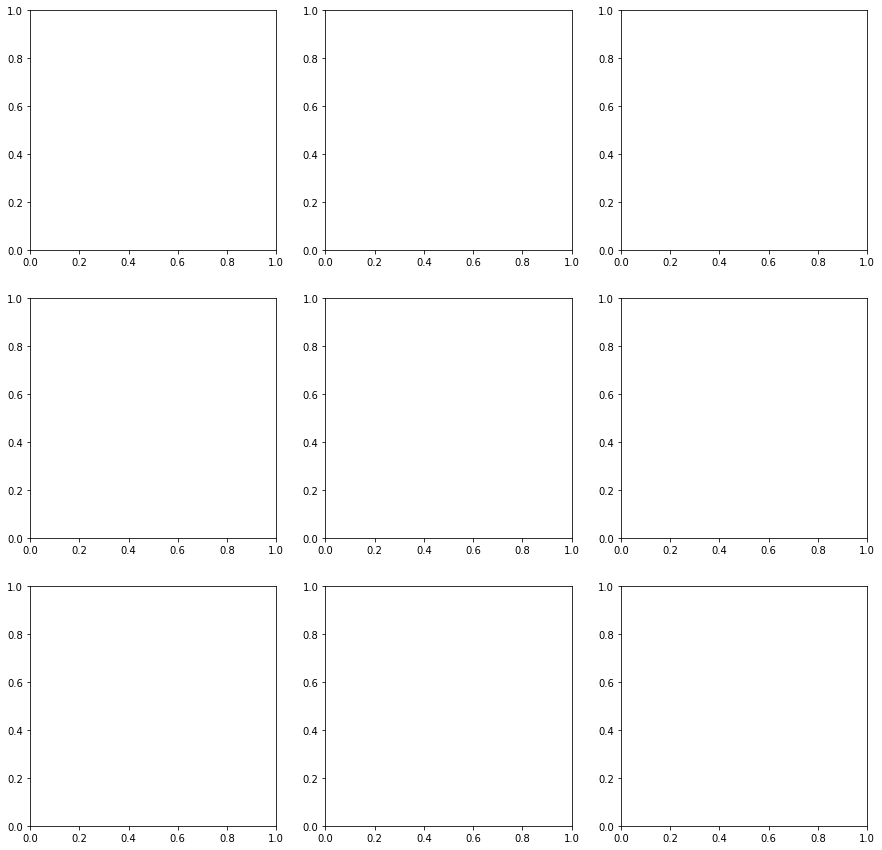

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
for i, axi in enumerate(ax.flat):
  for x in range(0,5):
    images=[tf.io.read_file(path) for path in df["path"]][:5]
    images= tf.image.decode_jpeg(first_images[np.random.randint(5)].numpy(),channels=3)
    axi.imshow(first_images[i])
    plt.show()

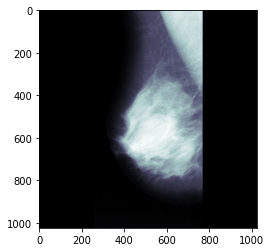

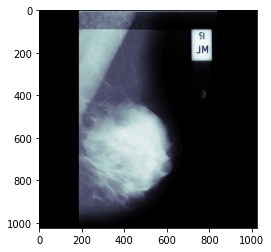

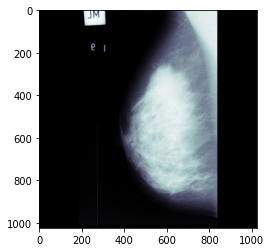

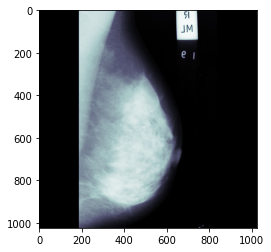

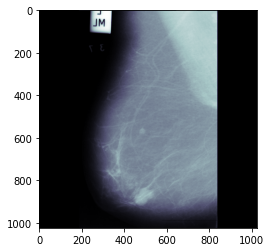

In [ ]:
#fig, ax = plt.subplots(3,3,figsize=(15,15))
#for i, axi in enumerate(ax.flat):
for x in range(0,5):
  img8 = Image.open([j for j in df["path"].values][x])
  plt.imshow(img8, cmap="bone")
  plt.show()

## Tensorflow

In [ ]:
tf_df = tf.data.Dataset.from_tensor_slices(df["path"].values)
tf_df

<TensorSliceDataset shapes: (), types: tf.string>

In [ ]:
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = tf.image.random_flip_left_right(img)
  #img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  
  return img

In [ ]:
tf_df = tf_df.map(load_and_preprocess_images)

In [ ]:
for example in tf_df.take(5):
  print(example)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(192, 192, 3), dtype=float32)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.

In [ ]:
labels= set([x for x in df["CLASS"]])
labels

{'ARCH', 'ASYM', 'CALC', 'CIRC', 'MISC', 'NORM', 'SPIC'}

In [ ]:
#labels_s= set([c for c in df["Class_s"]])
#labels_s

In [ ]:
 label_index = {}

for i, label in enumerate(labels):
  label_index[label]= i
  
label_index 

{'ARCH': 4, 'ASYM': 6, 'CALC': 3, 'CIRC': 0, 'MISC': 2, 'NORM': 1, 'SPIC': 5}

In [ ]:
[j for j in label_index]

['CIRC', 'NORM', 'MISC', 'CALC', 'ARCH', 'SPIC', 'ASYM']

In [ ]:
 #label_index = {}

#for j, label in enumerate(labels_s):
  #label_index[label]= i
  
#label_index 

In [ ]:
inv_label_index = dict(zip(label_index.values(), label_index.keys()))
inv_label_index

{0: 'CIRC', 1: 'NORM', 2: 'MISC', 3: 'CALC', 4: 'ARCH', 5: 'SPIC', 6: 'ASYM'}

In [ ]:
all_image_labels = [label_index[labels] for labels in df["CLASS"]]
all_image_labels[:10]

[0, 0, 1, 1, 0, 0, 1, 1, 1, 1]

In [ ]:
#[label_index[labels] for labels in df["CLASS"]]

In [ ]:
tf_label= tf.data.Dataset.from_tensor_slices(all_image_labels)
tf_label

<TensorSliceDataset shapes: (), types: tf.int32>

In [ ]:
for ex in tf_label.take(3):
  print(ex)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [ ]:
#df["SEVERITY"].value_counts()
#df["SEVERITY"].fillna("N")

In [ ]:
full_ds = tf.data.Dataset.zip((tf_df, tf_label))

In [ ]:
for example in full_ds.take(1):
  print(example)

(<tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=int3

In [ ]:
full_ds = full_ds.shuffle(len(df["path"]))

In [ ]:
#full_ds = full_ds.shuffle(len(df["path"])).batch(16)

In [ ]:
full_ds

<ShuffleDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [ ]:
train_size = int(0.8 * len(df))
train_set = full_ds.take(train_size).batch(16)
test_set = full_ds.skip(train_size).batch(16)

tf.Tensor(6, shape=(), dtype=int32)


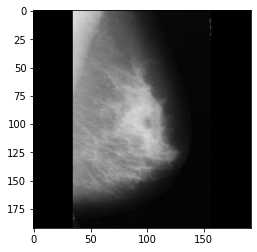

tf.Tensor(6, shape=(), dtype=int32)


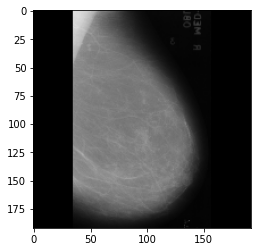

In [ ]:
for x, y in train_set.take(2):
  plt.imshow(x[0])
  print(y[0])
  plt.show()

In [ ]:
print(train_set)

for example in train_set.take(1):
  print(example)

<BatchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>
(<tf.Tensor: shape=(16, 192, 192, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
  

<BatchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>
tf.Tensor(6, shape=(), dtype=int32)


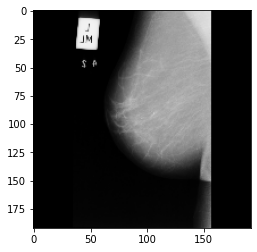

tf.Tensor(6, shape=(), dtype=int32)


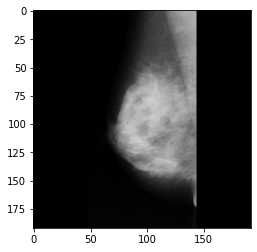

In [ ]:
print(test_set)

for x, y in test_set.take(2):
  plt.imshow(x[0])
  print(y[0])
  plt.show()

In [ ]:
for batch_x, batch_y in full_ds.take(3):
  plt.figure()
  plt.imshow(batch_x[0].numpy())
  plt.title(inv_label_index[batch_y[0].numpy()])
  
plt.show()  

## MODELS

### MODELS InceptionV3 (Concat class & Severity)

In [ ]:
df.head()

REFNUM BG CLASS  ...      Y  RADIUS                                         path
0  mdb001  G  CIRC  ...  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1  mdb002  G  CIRC  ...  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
2  mdb003  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg
3  mdb004  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg
4  mdb005  F  CIRC  ...  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg

[5 rows x 8 columns]

In [ ]:
df["SEVERITY"]= df["SEVERITY"].fillna("N")
df["CLASS_S"]=df["CLASS"]+"-"+df["SEVERITY"]
#df["path"] = df["REFNUM"].map(lambda x: '/content/drive/My Drive/mias_jpg/%s.jpg' % x)
df.head()

REFNUM BG CLASS  ... RADIUS                                         path  CLASS_S
0  mdb001  G  CIRC  ...  197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg   CIRC-B
1  mdb002  G  CIRC  ...   69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg   CIRC-B
2  mdb003  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg   NORM-N
3  mdb004  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg   NORM-N
4  mdb005  F  CIRC  ...   30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg   CIRC-B

[5 rows x 9 columns]

In [ ]:
df["CLASS_S"].unique()

array(['CIRC-B', 'NORM-N', 'MISC-B', 'CIRC-M', 'MISC-M', 'ASYM-M',
       'ASYM-B', 'ARCH-M', 'ARCH-B', 'SPIC-B', 'SPIC-M', 'CALC-M',
       'CALC-B'], dtype=object)

In [ ]:
tf_df = tf.data.Dataset.from_tensor_slices(df["path"].values)
tf_df

<TensorSliceDataset shapes: (), types: tf.string>

In [ ]:
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = tf.image.random_flip_left_right(img)
  #img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  
  return img

In [ ]:
tf_df = tf_df.map(load_and_preprocess_images)

In [ ]:
for example in tf_df.take(1):
  print(example)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(192, 192, 3), dtype=float32)


In [ ]:
labels_concat= set([x for x in df["CLASS_S"]])
labels_concat

{'ARCH-B',
 'ARCH-M',
 'ASYM-B',
 'ASYM-M',
 'CALC-B',
 'CALC-M',
 'CIRC-B',
 'CIRC-M',
 'MISC-B',
 'MISC-M',
 'NORM-N',
 'SPIC-B',
 'SPIC-M'}

In [ ]:
 label_index_concat = {}

for i, label in enumerate(labels_concat):
  label_index_concat[label]= i
  
label_index_concat

{'ARCH-B': 7,
 'ARCH-M': 8,
 'ASYM-B': 4,
 'ASYM-M': 1,
 'CALC-B': 5,
 'CALC-M': 11,
 'CIRC-B': 2,
 'CIRC-M': 0,
 'MISC-B': 9,
 'MISC-M': 12,
 'NORM-N': 3,
 'SPIC-B': 10,
 'SPIC-M': 6}

In [ ]:
inv_label_index_concat = dict(zip(label_index_concat.values(), label_index_concat.keys()))
inv_label_index_concat

{0: 'CIRC-M',
 1: 'ASYM-M',
 2: 'CIRC-B',
 3: 'NORM-N',
 4: 'ASYM-B',
 5: 'CALC-B',
 6: 'SPIC-M',
 7: 'ARCH-B',
 8: 'ARCH-M',
 9: 'MISC-B',
 10: 'SPIC-B',
 11: 'CALC-M',
 12: 'MISC-M'}

In [ ]:
 0: CIRC-M
 1: ASYM-M
 2: CIRC-B
 3: NORM-N
 4: ASYM-B
 5: CALC-B
 6: SPIC-M
 7: ARCH-B
 8: ARCH-M
 9: MISC-B
 10: SPIC-B
 11: CALC-M
 12: MISC-M

In [ ]:
inv_label_index_concat.values()

dict_values(['CIRC-M', 'ASYM-M', 'CIRC-B', 'NORM-N', 'ASYM-B', 'CALC-B', 'SPIC-M', 'ARCH-B', 'ARCH-M', 'MISC-B', 'SPIC-B', 'CALC-M', 'MISC-M'])

In [ ]:
all_image_labels_concat= [label_index_concat[labels_concat] for labels_concat in df["CLASS_S"]]
all_image_labels_concat[:10]

[2, 2, 3, 3, 2, 2, 3, 3, 3, 3]

In [ ]:
tf_label_concat= tf.data.Dataset.from_tensor_slices(all_image_labels_concat)
tf_label_concat

<TensorSliceDataset shapes: (), types: tf.int32>

In [ ]:
full_ds_concat = tf.data.Dataset.zip((tf_df, tf_label_concat))

In [ ]:
full_ds_concat = full_ds_concat.shuffle(len(df["path"]))

In [ ]:
train_size_concat = int(0.8 * len(df))
train_set_concat = full_ds_concat.take(train_size_concat).batch(16)
test_set_concat = full_ds_concat.skip(train_size_concat).batch(16)

tf.Tensor(1, shape=(), dtype=int32)


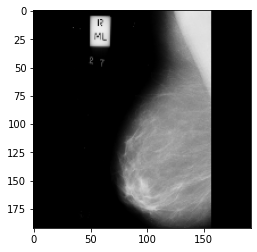

tf.Tensor(9, shape=(), dtype=int32)


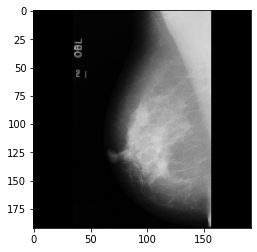

In [ ]:
for x, y in train_set_concat.take(2):
  plt.imshow(x[0])
  print(y[0])
  plt.show()

In [ ]:
base_model_concat = tf.keras.applications.InceptionV3(input_shape=(192,192,3), 
                                               include_top=False
                                               #weights = "imagenet"
                                                )

87916544/87910968 [==============================] - 4s 0us/step


In [ ]:
base_model_concat.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 95, 95, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 95, 95, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 95, 95, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
base_model_concat.trainable = False

model_concat = tf.keras.Sequential([
    base_model_concat,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels_concat), activation="softmax")
])
model_concat.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 13)                26637     
Total params: 21,829,421
Trainable params: 26,637
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:

initial_learning_rate_concat = 0.001

lr_schedule_concat = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_concat,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)


In [ ]:
METRICS = [
      ##tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.SparseCategoricalAccuracy(),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tfa.metrics.F1Score(num_classes=len(labels)),
      #tfa.metrics.MultiLabelConfusionMatrix(num_classes=len(labels)),
      ]

model_concat.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule_concat),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = METRICS)

In [ ]:
history = model_concat.fit(train_set_concat, epochs=60,validation_data=test_set_concat)

Epoch 1/60
17/17 [==============================] - 4s 255ms/step - loss: 2.1452 - sparse_categorical_accuracy: 0.5568 - val_loss: 1.5792 - val_sparse_categorical_accuracy: 0.5455
Epoch 2/60
17/17 [==============================] - 2s 112ms/step - loss: 1.6396 - sparse_categorical_accuracy: 0.5985 - val_loss: 1.2600 - val_sparse_categorical_accuracy: 0.6667
Epoch 3/60
17/17 [==============================] - 2s 115ms/step - loss: 1.4288 - sparse_categorical_accuracy: 0.6136 - val_loss: 1.3381 - val_sparse_categorical_accuracy: 0.6515
Epoch 4/60
17/17 [==============================] - 2s 113ms/step - loss: 1.2368 - sparse_categorical_accuracy: 0.6515 - val_loss: 1.1272 - val_sparse_categorical_accuracy: 0.6667
Epoch 5/60
17/17 [==============================] - 2s 107ms/step - loss: 1.1598 - sparse_categorical_accuracy: 0.6856 - val_loss: 1.0076 - val_sparse_categorical_accuracy: 0.6970
Epoch 6/60
17/17 [==============================] - 2s 111ms/step - loss: 1.0240 - sparse_categorica

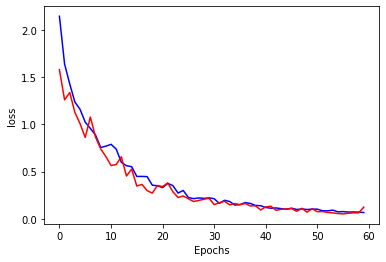

In [ ]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

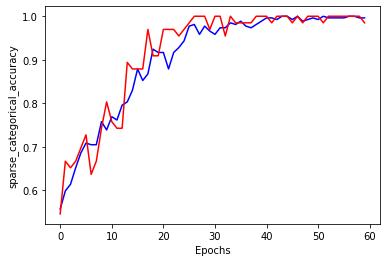

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

Pred : NORM-N
Truth : NORM-N


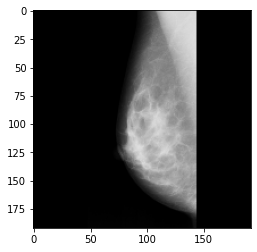

Pred : CALC-B
Truth : CALC-B


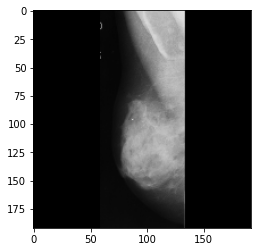

Pred : SPIC-M
Truth : SPIC-M


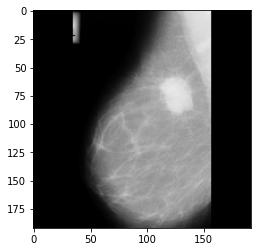

Pred : MISC-M
Truth : MISC-M


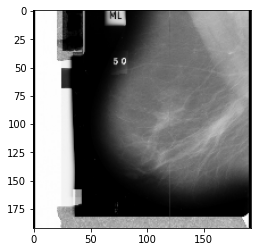

Pred : NORM-N
Truth : NORM-N


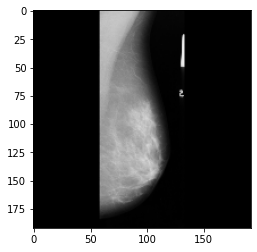

Pred : SPIC-B
Truth : SPIC-B


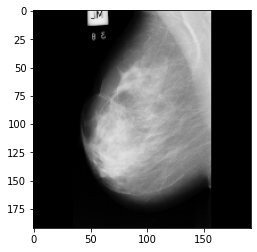

Pred : NORM-N
Truth : NORM-N


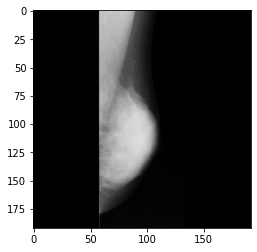

Pred : CIRC-B
Truth : CIRC-B


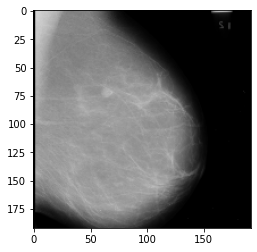

Pred : NORM-N
Truth : NORM-N


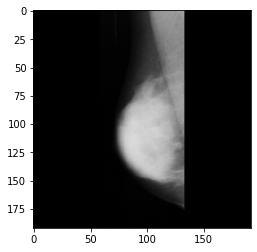

Pred : CALC-B
Truth : CALC-B


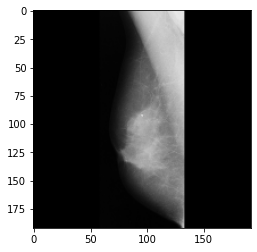

Pred : NORM-N
Truth : NORM-N


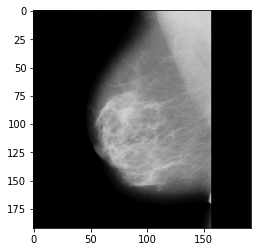

Pred : CALC-M
Truth : CALC-M


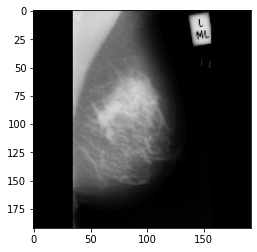

Pred : ASYM-M
Truth : ASYM-M


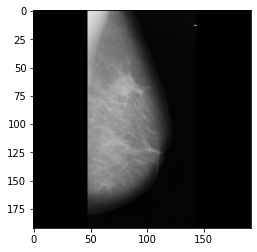

Pred : NORM-N
Truth : NORM-N


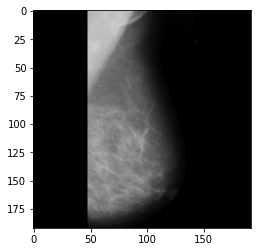

Pred : CIRC-M
Truth : CIRC-M


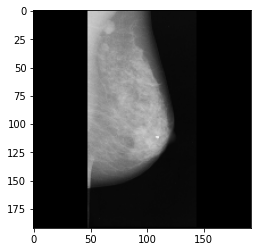

Pred : NORM-N
Truth : NORM-N


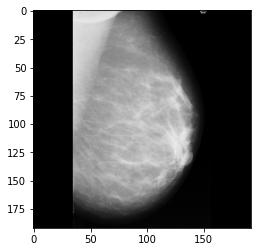

In [ ]:
for x, y in test_set_concat.take(1):
  for i in range(len(y)):
    #y_pred = model.predict(x)
    y_pred_concat = model_concat.predict_classes(x)
    print("Pred : {}\nTruth : {}".format(inv_label_index_concat[y_pred_concat[i]], inv_label_index_concat[y[i].numpy()])) 
    #print("Pred : {}\nTruth : {}".format(y_pred[i], y[i].numpy()))

    #inv_label_index_concat
    plt.imshow(x[i])
    plt.show()

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred = []

for batch, true_labels in test_set_concat:
  y_true += [true_labels.numpy()]
  y_pred += [(model_concat.predict_classes(batch)).astype(np.int32)]

In [ ]:
y_true = tf.concat([batch for batch in y_true], axis=0).numpy()
y_pred = tf.concat([batch for batch in y_pred], axis=0).numpy()


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



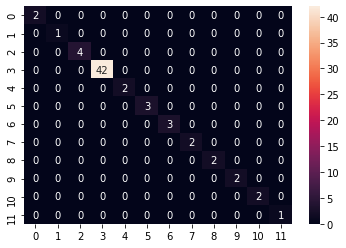

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

label_class = [j for j in label_index_concat]

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True) #fmt='d'


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred))


### MODEL_CONCAT VGG16

In [ ]:
df.head()

REFNUM BG CLASS  ... RADIUS                                         path  CLASS_S
0  mdb001  G  CIRC  ...  197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg   CIRC-B
1  mdb002  G  CIRC  ...   69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg   CIRC-B
2  mdb003  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg   NORM-N
3  mdb004  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg   NORM-N
4  mdb005  F  CIRC  ...   30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg   CIRC-B

[5 rows x 9 columns]

In [ ]:
tf_df

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [ ]:
inv_label_index_concat.values()

dict_values(['CIRC-M', 'ASYM-M', 'CIRC-B', 'NORM-N', 'ASYM-B', 'CALC-B', 'SPIC-M', 'ARCH-B', 'ARCH-M', 'MISC-B', 'SPIC-B', 'CALC-M', 'MISC-M'])

In [ ]:
labels_concat

{'ARCH-B',
 'ARCH-M',
 'ASYM-B',
 'ASYM-M',
 'CALC-B',
 'CALC-M',
 'CIRC-B',
 'CIRC-M',
 'MISC-B',
 'MISC-M',
 'NORM-N',
 'SPIC-B',
 'SPIC-M'}

In [ ]:
base_model2 = tf.keras.applications.VGG16(
    include_top=False,input_shape=(192,192,3)
)

In [ ]:
base_model2.trainable = False

In [ ]:
len(labels_concat)

13

In [ ]:
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels_concat), activation="softmax")
])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 13)                6669      
Total params: 14,721,357
Trainable params: 6,669
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
initial_learning_rate2 = 0.001

lr_schedule2 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate2,
    decay_steps=1000,
    decay_rate=0.90,
    staircase=True)

In [ ]:
METRICS = [
      ##tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.SparseCategoricalAccuracy(),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tfa.metrics.F1Score(num_classes=len(labels)),
      #tfa.metrics.MultiLabelConfusionMatrix(num_classes=len(labels)),
      ]


model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule2),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = METRICS)

In [ ]:
history2 = model2.fit(train_set_concat, epochs=60,validation_data=test_set_concat)

Epoch 1/60
17/17 [==============================] - 4s 250ms/step - loss: 2.5264 - sparse_categorical_accuracy: 0.1856 - val_loss: 2.0069 - val_sparse_categorical_accuracy: 0.6515
Epoch 2/60
17/17 [==============================] - 2s 142ms/step - loss: 1.8088 - sparse_categorical_accuracy: 0.6326 - val_loss: 1.6043 - val_sparse_categorical_accuracy: 0.6364
Epoch 3/60
17/17 [==============================] - 2s 142ms/step - loss: 1.5985 - sparse_categorical_accuracy: 0.6212 - val_loss: 1.5407 - val_sparse_categorical_accuracy: 0.6212
Epoch 4/60
17/17 [==============================] - 2s 141ms/step - loss: 1.5259 - sparse_categorical_accuracy: 0.6364 - val_loss: 1.4970 - val_sparse_categorical_accuracy: 0.6515
Epoch 5/60
17/17 [==============================] - 2s 141ms/step - loss: 1.5568 - sparse_categorical_accuracy: 0.6288 - val_loss: 1.6056 - val_sparse_categorical_accuracy: 0.6212
Epoch 6/60
17/17 [==============================] - 2s 142ms/step - loss: 1.4564 - sparse_categorica

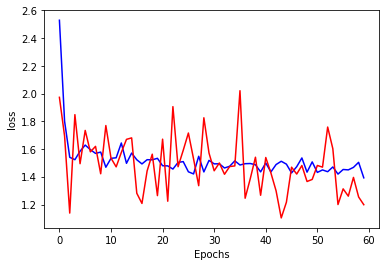

In [ ]:
plt.plot(history2.history["loss"], color="b")
plt.plot(history2.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

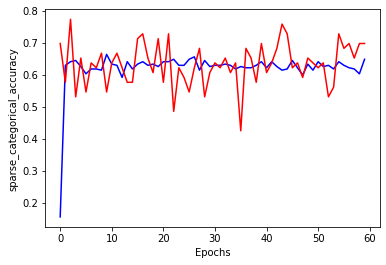

In [ ]:
plt.plot(history2.history["sparse_categorical_accuracy"], color="b")
plt.plot(history2.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

Pred : NORM-N
Truth : NORM-N


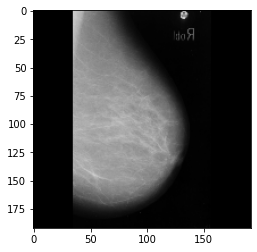

Pred : NORM-N
Truth : NORM-N


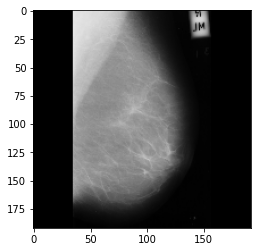

Pred : NORM-N
Truth : CALC-B


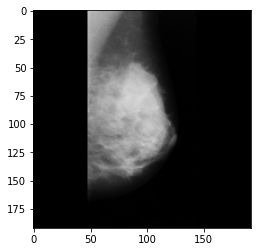

Pred : NORM-N
Truth : CIRC-B


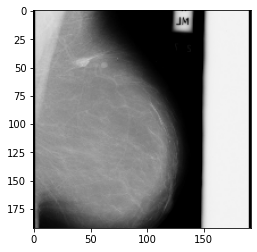

Pred : NORM-N
Truth : ARCH-B


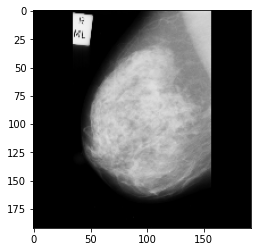

Pred : NORM-N
Truth : NORM-N


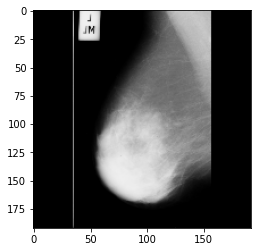

Pred : NORM-N
Truth : NORM-N


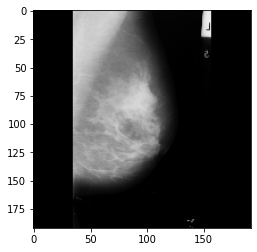

Pred : NORM-N
Truth : NORM-N


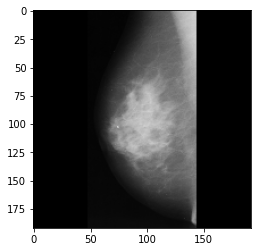

Pred : NORM-N
Truth : SPIC-B


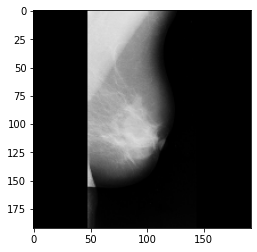

Pred : NORM-N
Truth : NORM-N


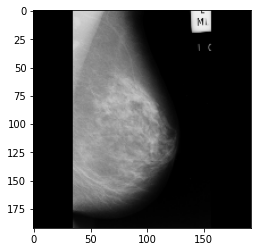

Pred : NORM-N
Truth : NORM-N


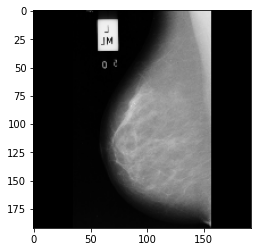

Pred : NORM-N
Truth : NORM-N


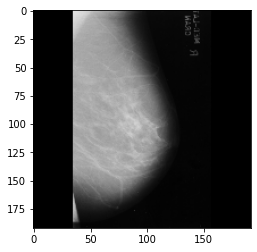

Pred : NORM-N
Truth : CIRC-M


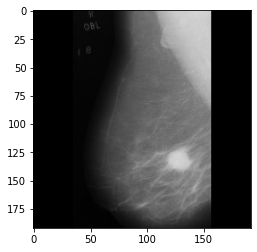

Pred : NORM-N
Truth : NORM-N


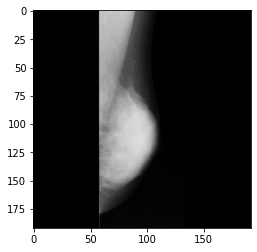

Pred : NORM-N
Truth : NORM-N


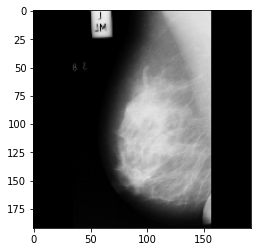

Pred : NORM-N
Truth : CIRC-B


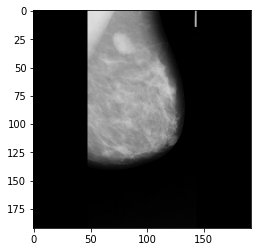

In [ ]:
for x, y in test_set_concat.take(1):
  for i in range(len(y)):
    #y_pred = model.predict(x)
    y_pred2 = model2.predict_classes(x)
    print("Pred : {}\nTruth : {}".format(inv_label_index_concat[y_pred2[i]], inv_label_index_concat[y[i].numpy()])) 
    #print("Pred : {}\nTruth : {}".format(y_pred[i], y[i].numpy()))

    #inv_label_index_concat
    plt.imshow(x[i])
    plt.show()


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.62      1.00      0.77        10
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2

    accuracy                           0.62        16
   macro avg       0.12      0.20      0.15        16
weighted avg       0.39      0.62      0.48        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


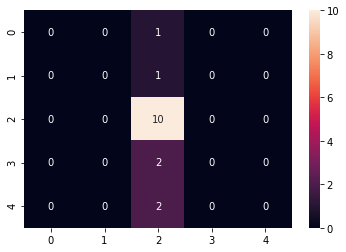

In [ ]:
y_true2 = []
y_pred2 = []

for batch2, true_labels2 in test_set_concat.take(1):
  y_true2 += [true_labels2.numpy()]
  y_pred2 += [(model2.predict_classes(batch2)).astype(np.int32)]


y_true2 = tf.concat([batch for batch in y_true2], axis=0).numpy()
y_pred2 = tf.concat([batch for batch in y_pred2], axis=0).numpy()

from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true2, y_pred2))

In [ ]:
classification_report?

Object `classification_report` not found.


### MODEL : Prediction des X et Y / Radius

In [ ]:
df.head()

REFNUM BG CLASS  ... RADIUS                                         path  CLASS_S
0  mdb001  G  CIRC  ...  197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg   CIRC-B
1  mdb002  G  CIRC  ...   69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg   CIRC-B
2  mdb003  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg   NORM-N
3  mdb004  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg   NORM-N
4  mdb005  F  CIRC  ...   30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg   CIRC-B

[5 rows x 9 columns]

In [ ]:
df_dim = df.copy()
df_dim.head()

REFNUM BG CLASS  ...      Y  RADIUS                                         path
0  mdb001  G  CIRC  ...  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1  mdb002  G  CIRC  ...  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
2  mdb003  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg
3  mdb004  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg
4  mdb005  F  CIRC  ...  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg

[5 rows x 8 columns]

In [ ]:
df_dim = df_dim[["X","Y","RADIUS","path"]]
df_dim.head()

X      Y  RADIUS                                         path
0  535.0  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1  522.0  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
2    NaN    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg
3    NaN    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg
4  477.0  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg

In [ ]:
len(df_dim)*0.2

66.0

In [ ]:
tf_df

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [ ]:
df_dim.isnull().sum()

X         211
Y         211
RADIUS    211
path        0
dtype: int64

In [ ]:
df_dim = df_dim.dropna()

In [ ]:
len(df_dim)

119

In [ ]:
tf_df_dim = tf.data.Dataset.from_tensor_slices(df_dim[["X","Y"]].values)
tf_df_dim

<TensorSliceDataset shapes: (2,), types: tf.float64>

In [ ]:
full_ds_dim = tf.data.Dataset.zip((tf_df, tf_df_dim))
full_ds_dim 

<ZipDataset shapes: ((192, 192, 3), (2,)), types: (tf.float32, tf.float64)>

In [ ]:
full_ds_dim = full_ds_dim.shuffle(len(df_dim["path"]))

In [ ]:
train_size_dim = int(0.8 * len(df_dim))
train_set_dim= full_ds_dim.take(train_size_dim).batch(16)
test_set_dim = full_ds_dim.skip(train_size_dim).batch(16)

In [ ]:
len(df_dim)-int(0.8 * len(df_dim))

24

In [ ]:
for example in full_ds_dim.take(1):
  print(example)

(<tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=fl

In [ ]:
base_model_dim = tf.keras.applications.InceptionV3(input_shape=(192,192,3), 
                                               include_top=False
                                               #weights = "imagenet"
                                                )

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model_dim.trainable = False

model_dim = tf.keras.Sequential([
    base_model_dim,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2)
])
model_dim.summary()

initial_learning_rate_dim = 0.005

lr_schedule_dim = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_dim,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model_dim.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule_dim),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics = tf.keras.metrics.MeanSquaredError())

In [ ]:
listeX = []
listeY =[]
for _, target in train_set_dim:
  listeX.append(target[0])
  listeY.append(target[1])
print(np.mean(listeX))
print(np.mean(listeY))

511.9166666666667
560.0


In [ ]:
dummy = [np.mean(listeX), np.mean(listeY)]

In [ ]:
len_test = len(df_dim)-int(0.8 * len(df_dim))

In [ ]:
dummy_rep = np.tile(dummy, (len_test,1))

In [ ]:

mse_baseline = 

In [ ]:
df_dim[["X","Y"]].head()

X      Y
0   535.0  425.0
1   522.0  280.0
4   477.0  133.0
5   500.0  168.0
10  525.0  425.0

In [ ]:
history_dim = model_dim.fit(train_set_dim, epochs=100,validation_data=test_set_dim)

Epoch 1/100
6/6 [==============================] - 9s 1s/step - loss: 261728.5000 - mean_squared_error: 261728.5000 - val_loss: 242281.4219 - val_mean_squared_error: 242281.4219
Epoch 2/100
6/6 [==============================] - 8s 1s/step - loss: 227998.6094 - mean_squared_error: 227998.6094 - val_loss: 189666.9531 - val_mean_squared_error: 189666.9531
Epoch 3/100
6/6 [==============================] - 8s 1s/step - loss: 201664.8594 - mean_squared_error: 201664.8594 - val_loss: 162341.8906 - val_mean_squared_error: 162341.8906
Epoch 4/100
6/6 [==============================] - 8s 1s/step - loss: 159681.8906 - mean_squared_error: 159681.8906 - val_loss: 139351.1875 - val_mean_squared_error: 139351.1875
Epoch 5/100
6/6 [==============================] - 8s 1s/step - loss: 146572.9219 - mean_squared_error: 146572.9219 - val_loss: 128313.7500 - val_mean_squared_error: 128313.7500
Epoch 6/100
6/6 [==============================] - 8s 1s/step - loss: 126652.3281 - mean_squared_error: 126652

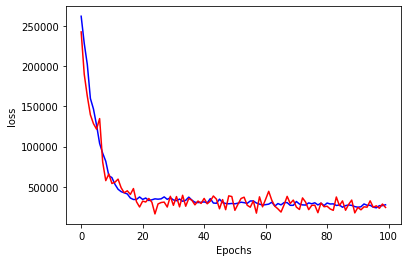

In [ ]:
plt.plot(history_dim.history["loss"], color="b")
plt.plot(history_dim.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

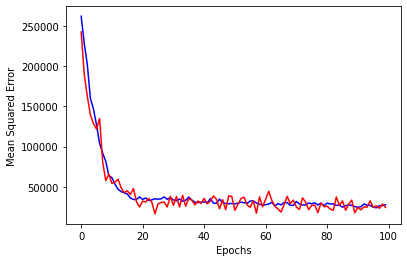

In [ ]:
plt.plot(history_dim.history["mean_squared_error"], color="b")
plt.plot(history_dim.history["val_mean_squared_error"], color="r")
plt.ylabel("Mean Squared Error")
plt.xlabel("Epochs")
plt.show()

### MODEL RADIUS

In [ ]:
tf_df

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [ ]:
tf_df_rad = tf.data.Dataset.from_tensor_slices(df_dim["RADIUS"].values)
tf_df_rad

<TensorSliceDataset shapes: (), types: tf.float64>

In [ ]:
full_ds_rad = tf.data.Dataset.zip((tf_df, tf_df_rad))
full_ds_rad

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.float64)>

In [ ]:
full_ds_rad = full_ds_rad.shuffle(len(df_dim["path"]))

train_size_rad = int(0.8 * len(df_dim))# changer la taille
train_set_rad= full_ds_rad.take(train_size_rad).batch(16)
test_set_rad = full_ds_rad.skip(train_size_rad).batch(16)

In [ ]:
base_model_rad = tf.keras.applications.InceptionV3(input_shape=(192,192,3), 
                                               include_top=False
                                               #weights = "imagenet"
                                                )

In [ ]:
base_model_rad.trainable = False

model_rad = tf.keras.Sequential([
    base_model_rad,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1)
])
model_rad.summary()

initial_learning_rate_rad = 0.005

lr_schedule_rad = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_rad,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model_rad.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule_rad),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics = tf.keras.metrics.MeanSquaredError())

In [ ]:
history_rad = model_rad.fit(train_set_rad, epochs=100,validation_data=test_set_rad)

Epoch 1/100
6/6 [==============================] - 9s 2s/step - loss: 2451.3872 - mean_squared_error: 2451.3872 - val_loss: 2375.5063 - val_mean_squared_error: 2375.5063
Epoch 2/100
6/6 [==============================] - 8s 1s/step - loss: 1364.4092 - mean_squared_error: 1364.4092 - val_loss: 763.7823 - val_mean_squared_error: 763.7823
Epoch 3/100
6/6 [==============================] - 8s 1s/step - loss: 1400.1752 - mean_squared_error: 1400.1752 - val_loss: 984.1848 - val_mean_squared_error: 984.1848
Epoch 4/100
6/6 [==============================] - 8s 1s/step - loss: 1179.2052 - mean_squared_error: 1179.2052 - val_loss: 819.5889 - val_mean_squared_error: 819.5889
Epoch 5/100
6/6 [==============================] - 8s 1s/step - loss: 1101.9480 - mean_squared_error: 1101.9480 - val_loss: 1343.2014 - val_mean_squared_error: 1343.2014
Epoch 6/100
6/6 [==============================] - 8s 1s/step - loss: 1133.0220 - mean_squared_error: 1133.0220 - val_loss: 2244.1228 - val_mean_squared_err

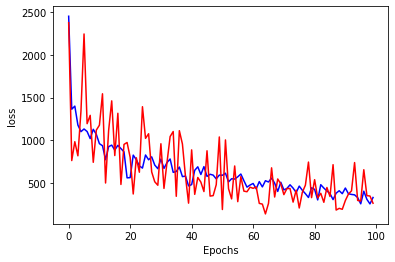

In [ ]:
plt.plot(history_rad.history["loss"], color="b")
plt.plot(history_rad.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

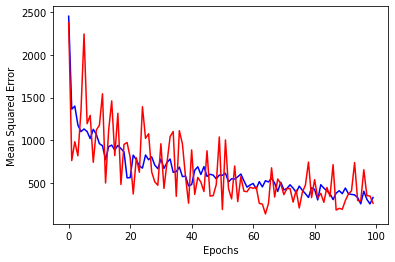

In [ ]:
plt.plot(history_rad.history["mean_squared_error"], color="b")
plt.plot(history_rad.history["val_mean_squared_error"], color="r")
plt.ylabel("Mean Squared Error")
plt.xlabel("Epochs")
plt.show()

In [ ]:
model_rad.predict(test_set_rad)[0]

array([89.71558], dtype=float32)

In [ ]:
model_dim.predict(test_set_dim)[0]

array([570.2454, 591.2412], dtype=float32)

In [ ]:
df_dim.head()

X      Y  RADIUS                                         path
0   535.0  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1   522.0  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
4   477.0  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg
5   500.0  168.0    26.0  /content/drive/My Drive/mias_jpg/mdb005.jpg
10  525.0  425.0    33.0  /content/drive/My Drive/mias_jpg/mdb010.jpg

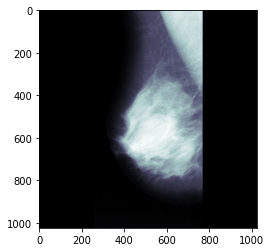

In [ ]:
from PIL import Image
import numpy as np
img = Image.open([i for i in df_dim["path"].values][0])
import matplotlib.pyplot as plt 
plt.imshow(img,cmap="bone")
plt.show()

NameError: ignored

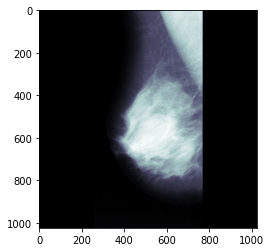

In [ ]:
from matplotlib.patches import Circle

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(img,cmap="bone")
circ = Circle(data,ec="blue")  
ax.add_patch(circ)

plt.show()

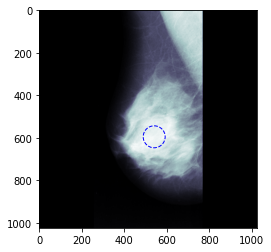

In [ ]:
from matplotlib.patches import Circle

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(img,cmap="bone")
circ = Circle((540.4158, 594.9767),51.706043,linestyle='--',fc=[0, 0, 0, 0],ec="blue")  
ax.add_patch(circ)

plt.show()

In [ ]:
for x, y in test_set.take(1):
  for i in range(len(y)):
    #y_pred = model.predict(x)
    y_pred = model.predict_classes(x)
    print("Pred : {}\nTruth : {}".format(inv_label_index[y_pred[i]], inv_label_index[y[i].numpy()])) 
    #print("Pred : {}\nTruth : {}".format(y_pred[i], y[i].numpy()))
    plt.imshow(x[i])
    plt.show()

NameError: ignored

In [ ]:
len_test = len(df_dim)-int(0.8 * len(df_dim))
len_test

24

[482.92783 528.9505 ]
[27.3311]


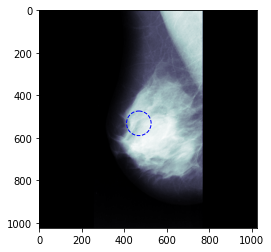

[490.02975 568.07776]
[24.270464]


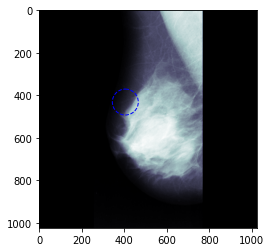

[428.0217  469.23526]
[26.971836]


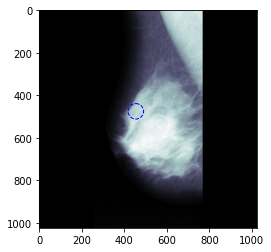

[484.64096 530.0167 ]
[89.71555]


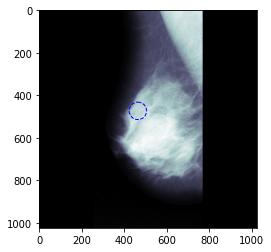

[428.0217  469.23532]
[81.53581]


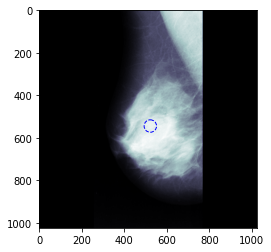

[431.12344 473.04205]
[66.190315]


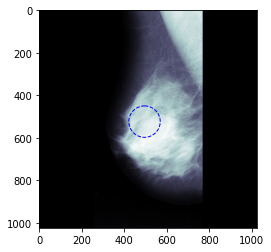

[398.49387 419.68936]
[40.847294]


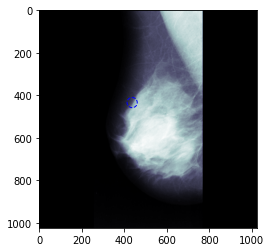

[368.96915 407.24277]
[59.61489]


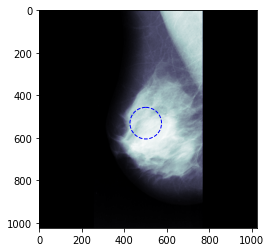

[588.2703  579.30615]
[55.028183]


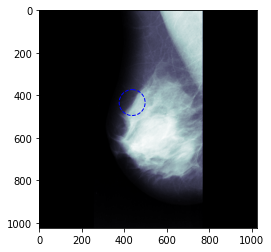

[503.18082 547.5033 ]
[31.11342]


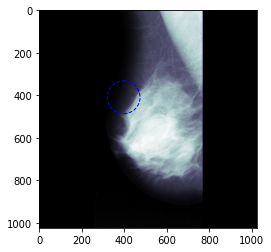

[469.65884 518.3142 ]
[75.33298]


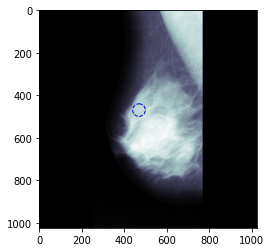

[518.2215 511.6217]
[45.36704]


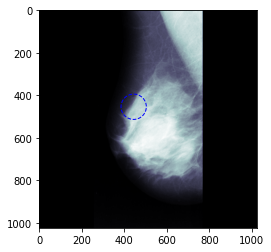

[487.1727 488.6622]
[53.450863]


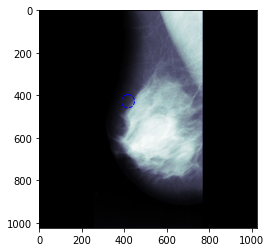

[539.04297 577.2923 ]
[68.79207]


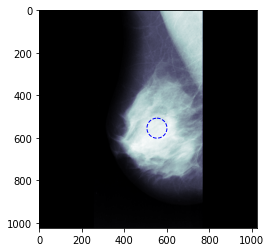

[489.8289  540.69116]
[90.538475]


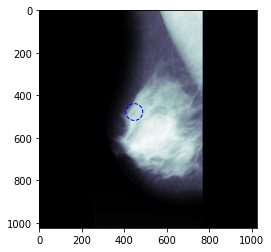

[488.0616 552.0635]
[75.652824]


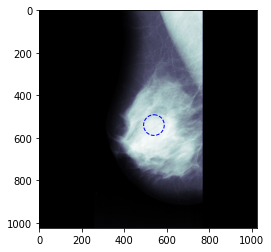

[465.34042 454.8077 ]
[41.11677]


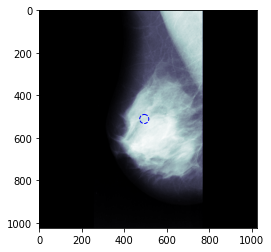

[602.1956  608.01086]
[63.306595]


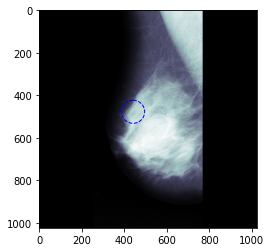

[507.00876 548.5755 ]
[92.92348]


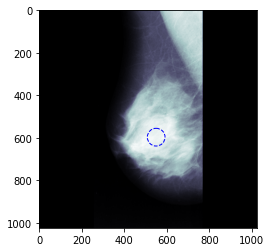

[542.5591  564.06824]
[32.205048]


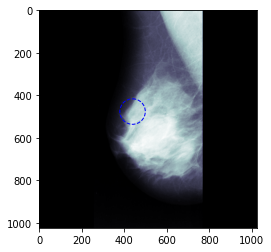

[407.15063 428.19147]
[15.213429]


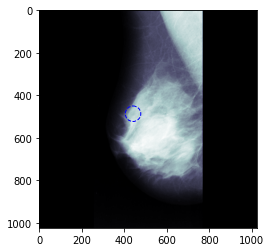

[480.57025 492.36038]
[25.40555]


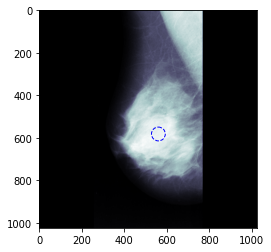

[533.9793  527.29144]
[25.40555]


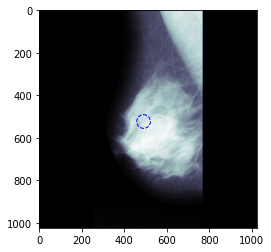

[588.26996 579.3057 ]
[36.26902]


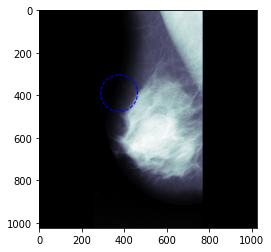

In [ ]:
from matplotlib.patches import Circle

for i in range(len_test):
  fig,ax = plt.subplots(1)
  ax.set_aspect('equal')

  ax.imshow(img,cmap="bone")
#circ = Circle((540.4158, 594.9767),51.706043,linestyle='--',fc=[0, 0, 0, 0],ec="blue")
  circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],linestyle='--',fc=[0, 0, 0, 0],ec="blue")
  print(model_dim.predict(test_set_dim)[i])
  print(model_rad.predict(test_set_rad)[i])
  ax.add_patch(circ)

  plt.show()

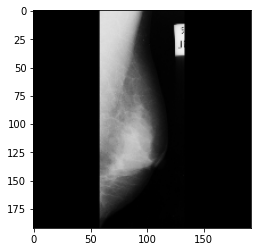

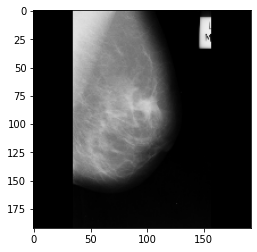

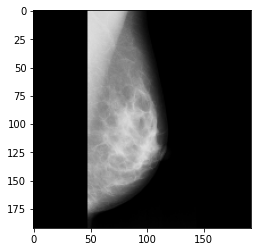

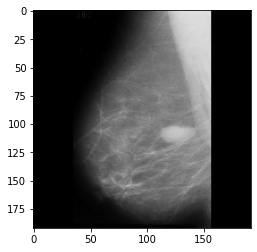

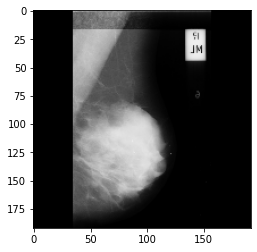

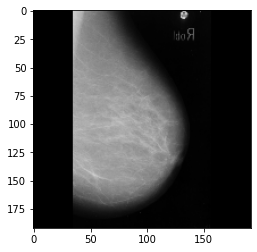

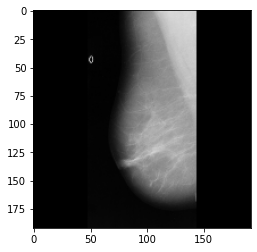

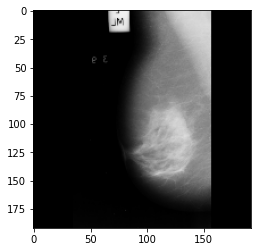

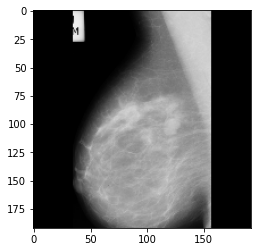

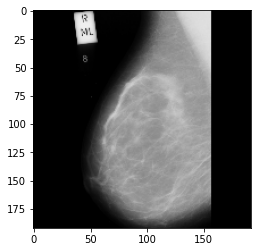

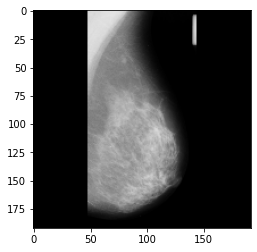

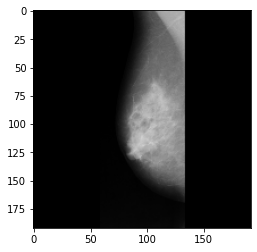

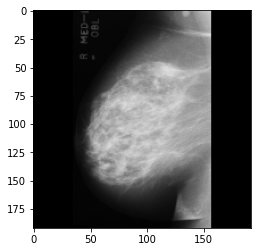

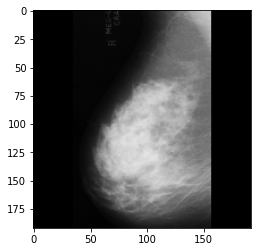

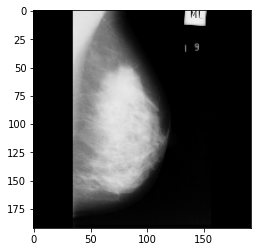

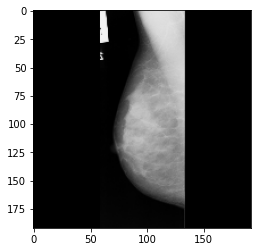

In [ ]:
from matplotlib.patches import Circle

for c, d in test_set_rad.take(1):
  for i in range(len(d)):
    #coord = list(model_dim.predict(test_set_dim)[i]) + list(model_rad.predict(test_set_rad)[i])
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')


    y_pred_rad = model_rad.predict(c)

    ax.imshow(c[i],cmap="bone")
    circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],ec="blue")
    circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],linestyle='--',fc=[0, 0, 0, 0],ec="blue")
    ax.add_patch(circ)
    plt.show()

In [ ]:
model_rad.predict(c)

array([[34.098114],
       [44.4838  ],
       [25.000563],
       [86.788666],
       [43.693306],
       [33.073685],
       [31.214928],
       [48.956097],
       [29.607061],
       [31.959126],
       [34.740406],
       [31.1926  ],
       [80.323875],
       [32.162987],
       [53.481987],
       [13.309727]], dtype=float32)

In [ ]:
model_dim.predict(test_set_dim)


array([[374.3505 , 433.13983],
       [482.38724, 491.4682 ],
       [465.2847 , 476.67072],
       [501.83148, 553.37195],
       [531.9198 , 610.05914],
       [339.63046, 364.15332],
       [507.39532, 599.7186 ],
       [469.77402, 498.13345],
       [476.6925 , 501.96347],
       [427.26633, 461.0197 ],
       [538.8697 , 584.04877],
       [500.6217 , 519.2398 ],
       [405.38126, 434.22504],
       [471.336  , 526.7968 ],
       [448.53604, 485.4913 ],
       [500.8896 , 516.2795 ],
       [469.14194, 521.66296],
       [539.64215, 516.31305],
       [576.9679 , 662.53357],
       [546.2755 , 582.59064],
       [543.9223 , 571.614  ],
       [477.56918, 563.24744],
       [431.80618, 466.4735 ],
       [466.12814, 495.234  ]], dtype=float32)

In [ ]:
model_rad.predict(test_set_rad)

array([[62.131577],
       [43.013653],
       [92.36203 ],
       [50.056618],
       [34.560776],
       [47.590946],
       [49.58596 ],
       [40.41763 ],
       [48.924442],
       [49.949383],
       [37.66273 ],
       [41.700424],
       [31.1926  ],
       [72.43038 ],
       [50.33608 ],
       [40.067375],
       [77.8351  ],
       [62.5594  ],
       [23.929953],
       [41.00671 ],
       [43.279503],
       [41.239506],
       [78.130516],
       [25.993704]], dtype=float32)

In [ ]:
model_rad.predict(c)

array([[34.098114],
       [44.4838  ],
       [25.000563],
       [86.788666],
       [43.693306],
       [33.073685],
       [31.214928],
       [48.956097],
       [29.607061],
       [31.959126],
       [34.740406],
       [31.1926  ],
       [80.323875],
       [32.162987],
       [53.481987],
       [13.309727]], dtype=float32)

[442.1061 438.045 ]
[40.73871]


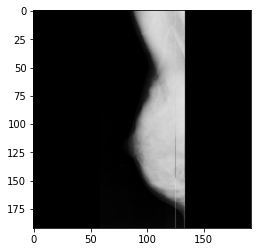

[524.45825 545.5453 ]
[65.87001]


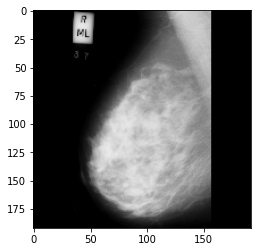

[471.2656  469.68246]
[25.998692]


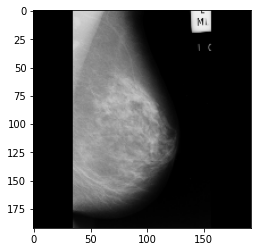

[478.34634 556.6828 ]
[79.82383]


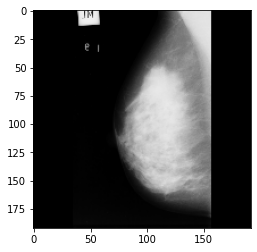

[380.34003 377.09726]
[75.33298]


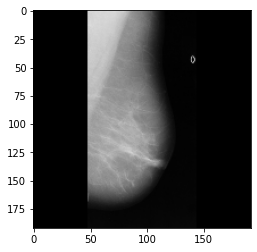

[493.65826 511.04718]
[22.707603]


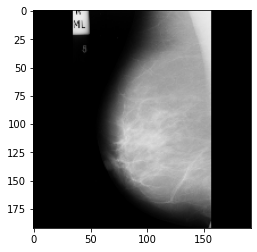

[541.6774  598.55896]
[39.123028]


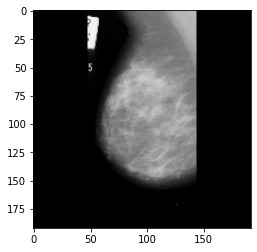

[574.91846 657.6725 ]
[80.53676]


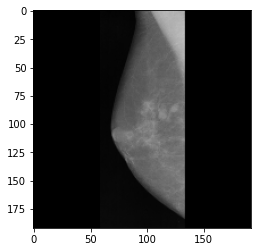

[473.796   507.62045]
[43.81245]


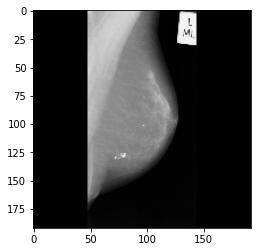

[412.88956 407.15036]
[39.206154]


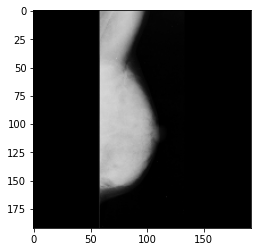

[502.5529  498.78415]
[37.6879]


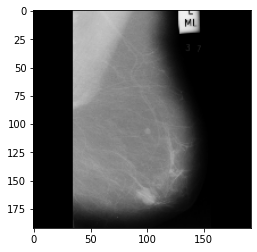

[488.11234 525.8152 ]
[38.610626]


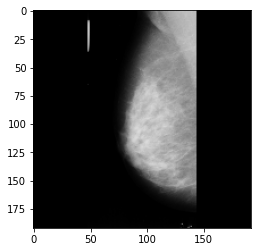

[442.61148 451.70706]
[37.747158]


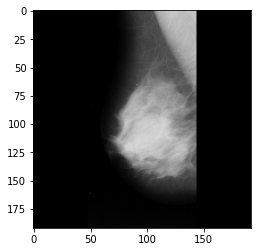

[462.08157 510.62888]
[68.79207]


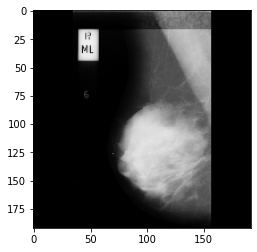

[570.48303 578.60266]
[26.581545]


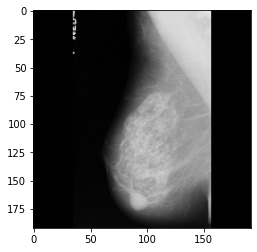

[524.49194 550.9088 ]
[80.68851]


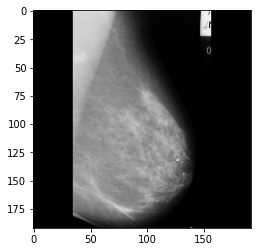

In [ ]:
from matplotlib.patches import Circle
import matplotlib.patches as mpatches

for c, d in test_set_dim.take(1):
  for i in range(len(d)):
    #coord = list(model_dim.predict(test_set_dim)[i]) + list(model_rad.predict(test_set_rad)[i])
    fig,ax = plt.subplots(1)
    #ax.set_aspect('equal')


    #y_pred_rad = model_rad.predict(c)

    ax.imshow(c[i],cmap="bone")
    #circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],ec="blue")
    circ = mpatches.Circle(model_dim.predict(test_set_dim)[i],radius = model_rad.predict(test_set_rad)[i],color="r")
    


    print(model_dim.predict(test_set_dim)[i])
    print(model_rad.predict(test_set_rad)[i])
    #circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],linestyle='--',fc=[0, 0, 0, 0],ec="blue")
    ax.add_patch(circ)
    #ax.add_patch(art)
    plt.show()

[90.25073 96.38056]
[15.138664]


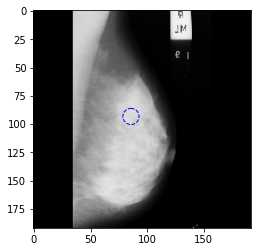

[86.55507 84.19606]
[10.4049835]


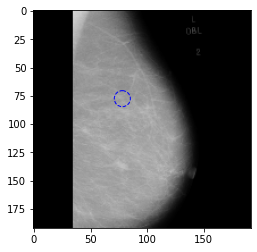

[ 91.62427 108.06009]
[19.424246]


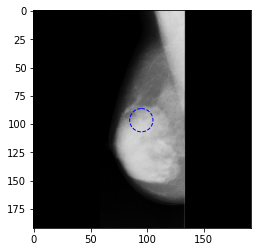

[74.1527  78.02244]
[2.7353406]


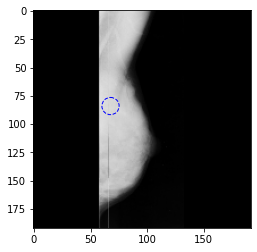

[94.305145 90.35941 ]
[6.185107]


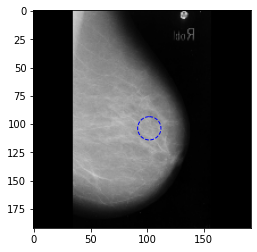

[102.68621 110.49802]
[10.278766]


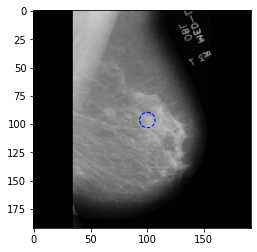

[101.46747 111.69912]
[12.827438]


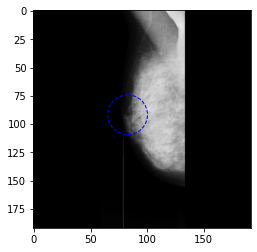

[114.006485 122.419846]
[12.346773]


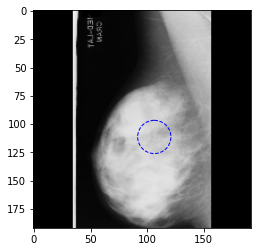

[74.198746 77.116776]
[8.906641]


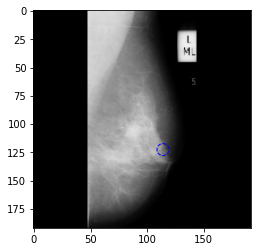

[92.49717 99.38849]
[4.6691527]


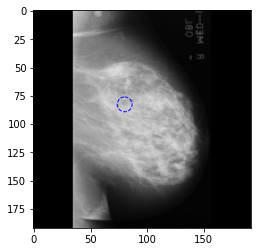

[101.91309 103.64665]
[11.437143]


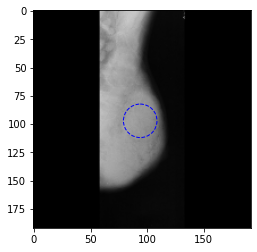

[93.31415 99.15526]
[6.662771]


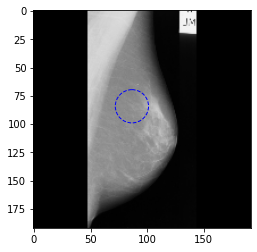

[80.728195 89.1393  ]
[12.899654]


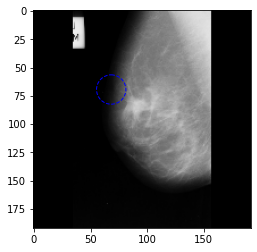

[95.4536  96.62372]
[7.9373546]


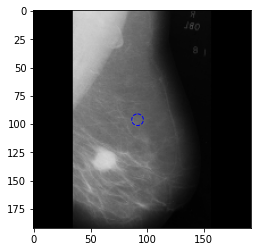

[ 92.42296 102.43274]
[6.931329]


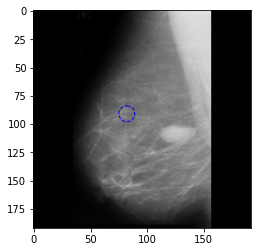

[103.17808 109.3416 ]
[13.762196]


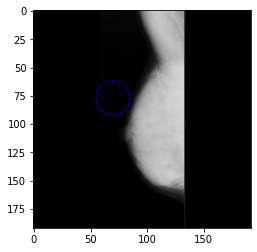

In [ ]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for c, d in test_set_rad.take(1):
  for i in range(len(d)):
    #coord = list(model_dim.predict(test_set_dim)[i]) + list(model_rad.predict(test_set_rad)[i])
    fig,ax = plt.subplots()
    ax.set_aspect('equal')


    #y_pred_rad = model_rad.predict(c)

    ax.imshow(c[i],cmap="bone")
    #circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],ec="blue")
    circ = patches.Circle((model_dim.predict(test_set_dim)[i]*(192/1024)),radius =(model_rad.predict(test_set_rad)[i]*(192/1024)),ec="blue",fc=[0, 0, 0, 0],linestyle='--')
    #cir2 = patches.Circle
    print(model_dim.predict(test_set_dim)[i]*(192/1024))
    print(model_rad.predict(test_set_rad)[i]*(192/1024))
    #circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],linestyle='--',fc=[0, 0, 0, 0],ec="blue")
    ax.add_patch(circ)
    plt.show()

In [ ]:
df.head()

REFNUM BG CLASS  ...      Y  RADIUS                                         path
0  mdb001  G  CIRC  ...  425.0   197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg
1  mdb002  G  CIRC  ...  280.0    69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg
2  mdb003  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg
3  mdb004  D  NORM  ...    NaN     NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg
4  mdb005  F  CIRC  ...  133.0    30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg

[5 rows x 8 columns]

In [ ]:
for row in df.iterrows():
  #fig,ax = plt.subplots()

  coords = model_dim.predict(tf.data.Dataset.from_tensors(load_and_preprocess_images(row[7])).batch(1))
  radius = model_rad.predict(tf.data.Dataset.from_tensors(load_and_preprocess_images(row[7])).batch(1))
  plt.imshow(row[7])
  plt.cercle(row[4],row[5],row[6], color = "red")
  plt.cercle(coords[0],coords[1],radius, color = "blue")
  plt.show()

IndexError: ignored

In [ ]:
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = tf.image.random_flip_left_right(img)
  #img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  

  load_and_preprocess_images
  return img

In [ ]:
test_set_rad

<BatchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.float64)>

In [ ]:
for c, d in test_set_rad.take(1):
  for i in range(len(d)):
    #coord = list(model_dim.predict(test_set_dim)[i]) + list(model_rad.predict(test_set_rad)[i])
    fig,ax = plt.subplots()
    ax.set_aspect('equal')


    #y_pred_rad = model_rad.predict(c)

    ax.imshow(c[i],cmap="bone")
    #circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],ec="blue")
    circ = patches.Circle((model_dim.predict(test_set_dim)[i]*(192/1024)),radius =(model_rad.predict(test_set_rad)[i]*(192/1024)),ec="blue")
    #cir2 = patches.Circle
    print(model_dim.predict(test_set_dim)[i]*(192/1024))
    print(model_rad.predict(test_set_rad)[i]*(192/1024))
    #circ = Circle(model_dim.predict(test_set_dim)[i],model_rad.predict(test_set_rad)[i],linestyle='--',fc=[0, 0, 0, 0],ec="blue")
    ax.add_patch(circ)
    plt.show()

## Old Model

### MODEL INCEPTIONV3

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(192,192,3), 
                                               include_top=False
                                               #weights = "imagenet"
                                                )

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 95, 95, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 95, 95, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 95, 95, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
base_model.trainable = False
#evite d'entrainer les autres couches du modele

In [ ]:
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation="softmax")
])
model.summary()

initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)



In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 4, 4, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 21,817,127
Trainable params: 14,343
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
import tensorflow_addons as tfa

In [ ]:
#tfa.metrics.F1Score(num_classes=len(labels))

In [ ]:
METRICS = [
      ##tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.SparseCategoricalAccuracy(),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tfa.metrics.F1Score(num_classes=len(labels)),
      #tfa.metrics.MultiLabelConfusionMatrix(num_classes=len(labels)),
      ]


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = METRICS)

In [ ]:
#BATCH_SIZE= 30

history = model.fit(train_set, epochs=60,validation_data=test_set)


Epoch 1/60
17/17 [==============================] - 6s 354ms/step - loss: 1.7173 - sparse_categorical_accuracy: 0.5795 - val_loss: 1.3249 - val_sparse_categorical_accuracy: 0.6364
Epoch 2/60
17/17 [==============================] - 3s 176ms/step - loss: 1.4009 - sparse_categorical_accuracy: 0.5871 - val_loss: 1.4615 - val_sparse_categorical_accuracy: 0.4545
Epoch 3/60
17/17 [==============================] - 3s 177ms/step - loss: 1.2486 - sparse_categorical_accuracy: 0.6061 - val_loss: 1.1368 - val_sparse_categorical_accuracy: 0.6515
Epoch 4/60
17/17 [==============================] - 3s 179ms/step - loss: 1.1571 - sparse_categorical_accuracy: 0.6023 - val_loss: 1.0701 - val_sparse_categorical_accuracy: 0.6515
Epoch 5/60
17/17 [==============================] - 3s 178ms/step - loss: 0.9990 - sparse_categorical_accuracy: 0.6629 - val_loss: 0.9501 - val_sparse_categorical_accuracy: 0.7424
Epoch 6/60
17/17 [==============================] - 3s 177ms/step - loss: 0.9666 - sparse_categorica

In [ ]:
#history.history

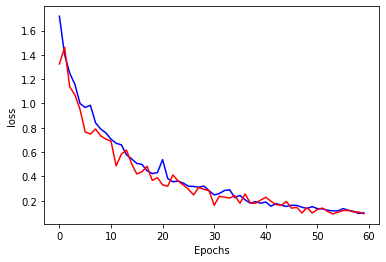

In [ ]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

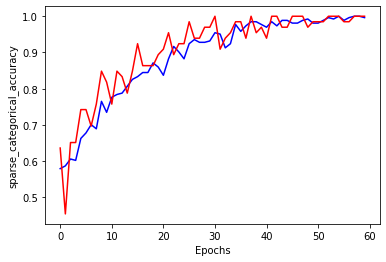

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [ ]:
for example in test_set.take(1):
  features, labels = example
preds = model.predict(test_set.take(1))
# preds = model(features)
y_preds = tf.argmax(preds, axis=1)
y_preds

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([6, 6, 5, 6, 6, 6, 5, 1, 6, 6, 6, 5, 1, 0, 6, 6])>

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Pred : SPIC
Truth : SPIC


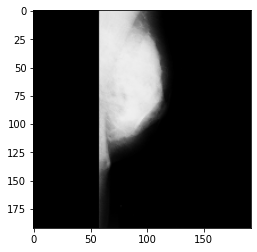

Pred : CALC
Truth : CALC


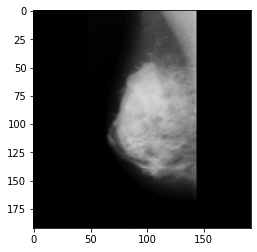

Pred : NORM
Truth : NORM


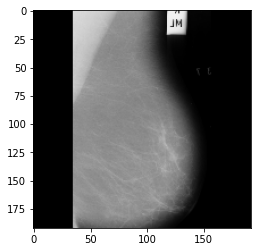

Pred : MISC
Truth : MISC


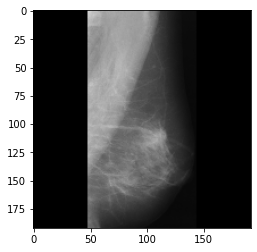

Pred : NORM
Truth : NORM


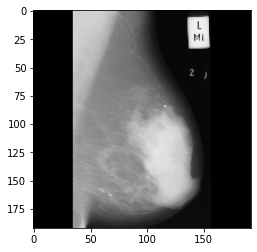

Pred : CALC
Truth : CALC


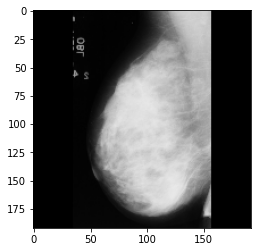

Pred : MISC
Truth : MISC


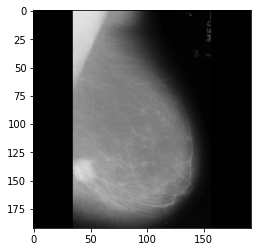

Pred : ASYM
Truth : ASYM


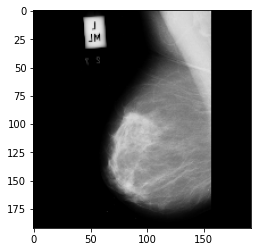

Pred : ARCH
Truth : ARCH


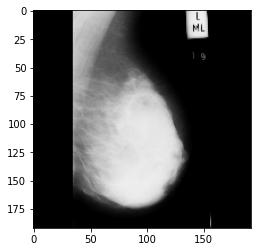

Pred : NORM
Truth : NORM


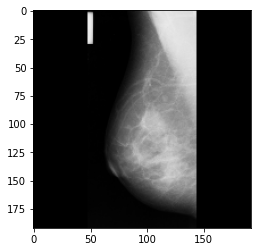

Pred : NORM
Truth : NORM


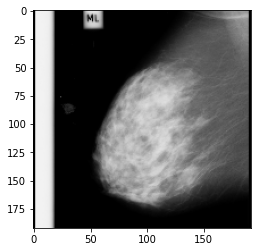

Pred : NORM
Truth : NORM


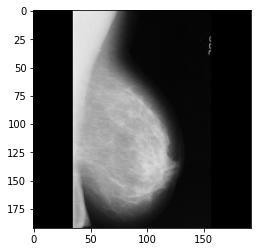

Pred : NORM
Truth : NORM


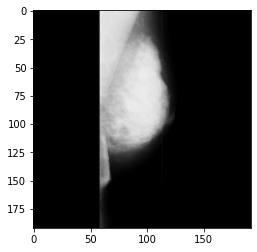

Pred : NORM
Truth : NORM


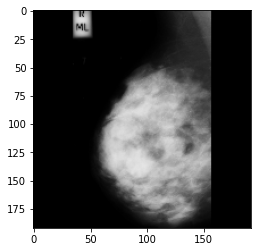

Pred : CALC
Truth : CALC


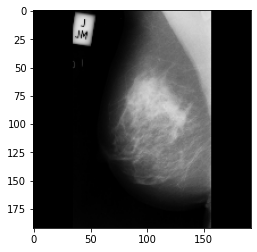

Pred : NORM
Truth : NORM


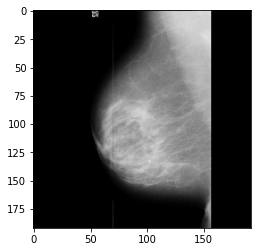

Pred : NORM
Truth : NORM


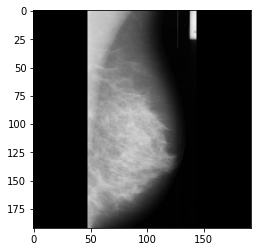

Pred : NORM
Truth : NORM


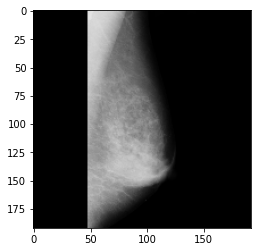

Pred : CALC
Truth : CALC


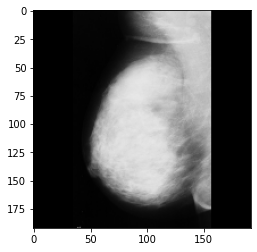

Pred : NORM
Truth : NORM


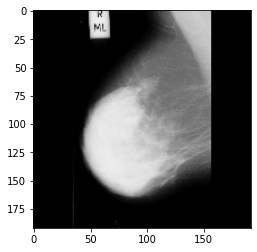

Pred : SPIC
Truth : SPIC


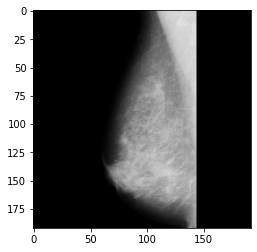

Pred : NORM
Truth : NORM


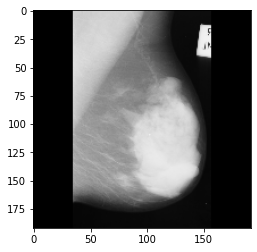

Pred : NORM
Truth : NORM


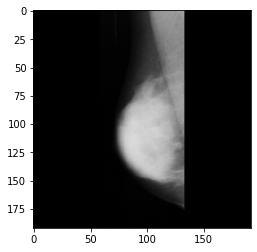

Pred : CALC
Truth : CALC


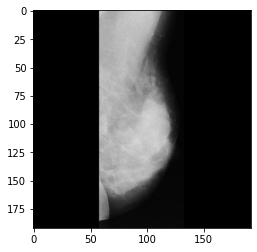

Pred : NORM
Truth : NORM


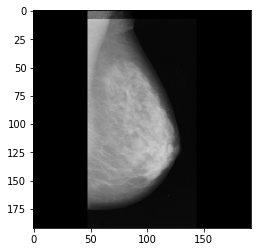

Pred : NORM
Truth : NORM


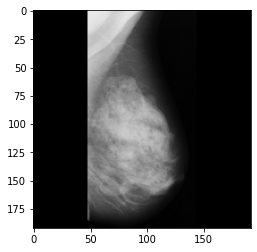

Pred : NORM
Truth : NORM


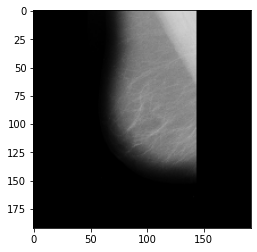

Pred : CALC
Truth : CALC


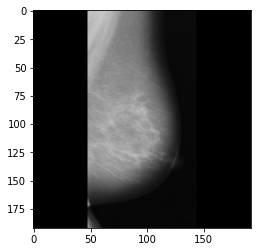

Pred : CALC
Truth : CALC


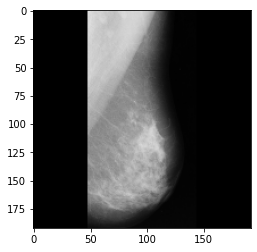

Pred : NORM
Truth : NORM


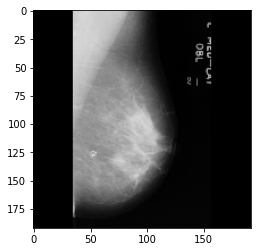

Pred : NORM
Truth : NORM


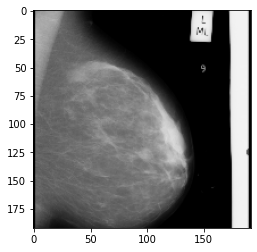

Pred : ASYM
Truth : ASYM


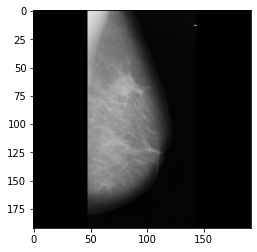

Pred : CALC
Truth : CALC


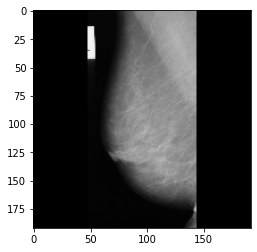

Pred : NORM
Truth : NORM


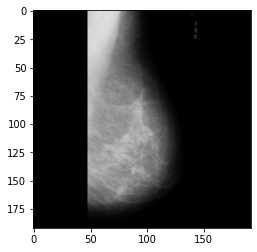

Pred : CIRC
Truth : CIRC


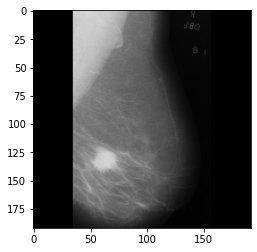

Pred : MISC
Truth : MISC


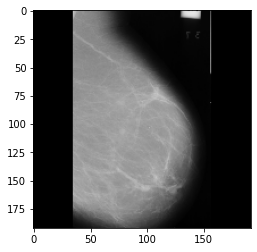

Pred : NORM
Truth : NORM


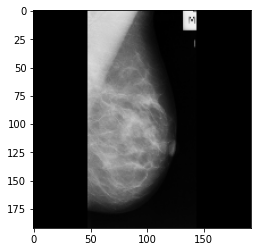

Pred : MISC
Truth : MISC


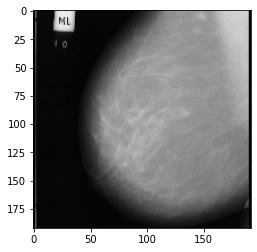

Pred : NORM
Truth : NORM


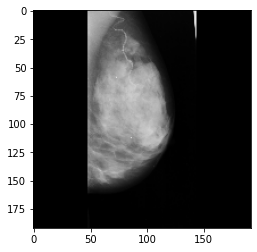

Pred : NORM
Truth : NORM


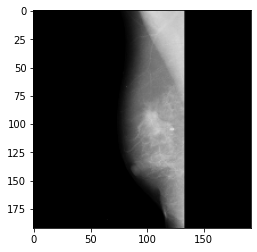

Pred : NORM
Truth : NORM


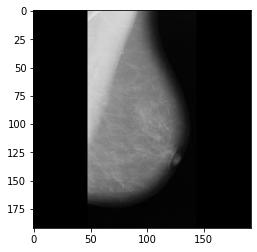

Pred : NORM
Truth : NORM


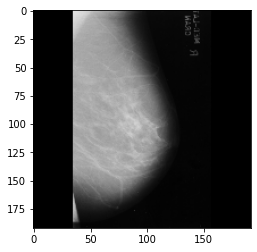

Pred : NORM
Truth : NORM


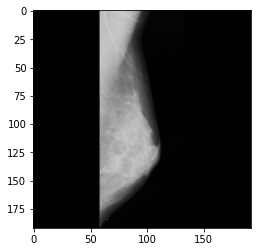

Pred : MISC
Truth : MISC


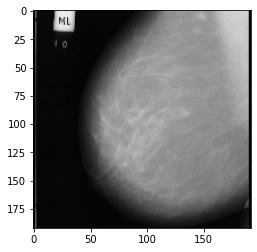

Pred : CIRC
Truth : CIRC


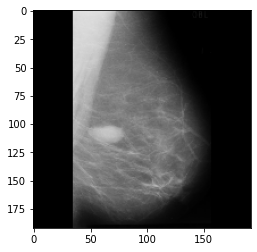

Pred : CIRC
Truth : CIRC


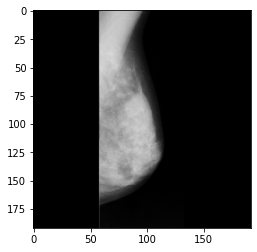

Pred : NORM
Truth : NORM


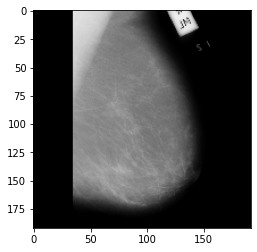

Pred : NORM
Truth : NORM


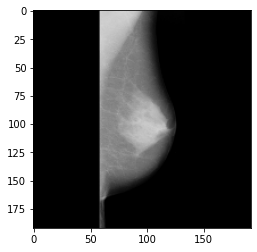

Pred : CIRC
Truth : CIRC


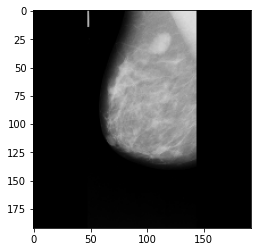

Pred : NORM
Truth : NORM


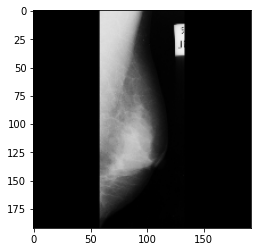

Pred : NORM
Truth : NORM


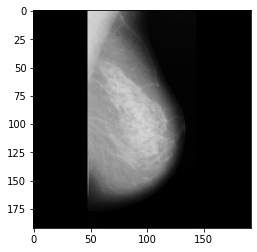

Pred : SPIC
Truth : SPIC


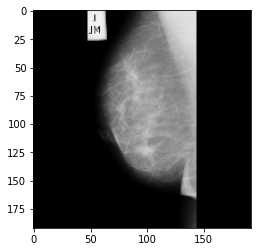

Pred : MISC
Truth : MISC


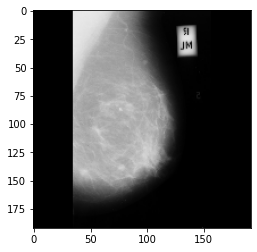

Pred : NORM
Truth : NORM


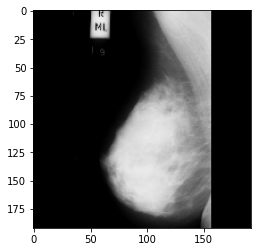

Pred : NORM
Truth : NORM


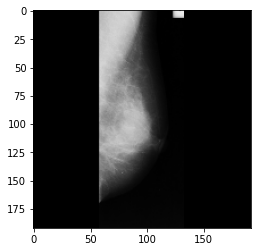

Pred : NORM
Truth : NORM


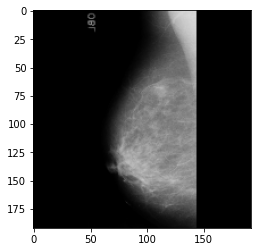

Pred : NORM
Truth : NORM


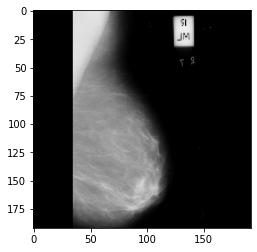

Pred : NORM
Truth : NORM


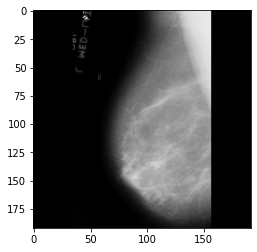

Pred : NORM
Truth : NORM


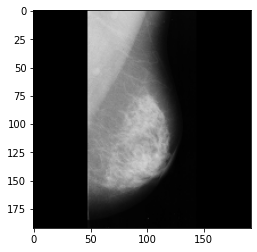

Pred : CIRC
Truth : CIRC


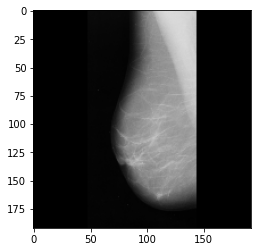

Pred : NORM
Truth : NORM


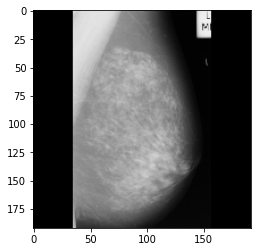

Pred : ASYM
Truth : ASYM


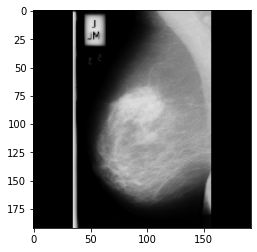

Pred : ASYM
Truth : ASYM


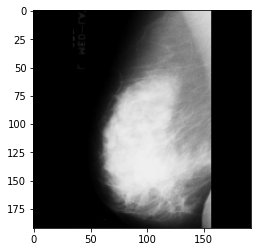

Pred : NORM
Truth : NORM


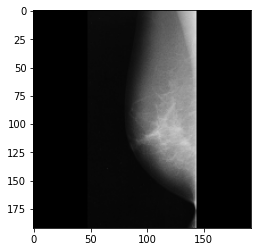

Pred : ASYM
Truth : ASYM


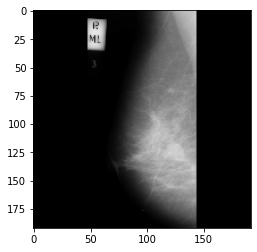

Pred : NORM
Truth : NORM


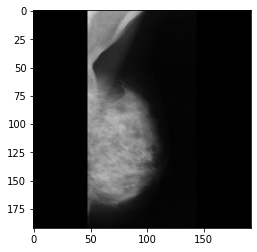

In [ ]:
for x, y in test_set.take(5):
  for i in range(len(y)):
    #y_pred = model.predict(x)
    y_pred = model.predict_classes(x)
    print("Pred : {}\nTruth : {}".format(inv_label_index[y_pred[i]], inv_label_index[y[i].numpy()])) 
    #print("Pred : {}\nTruth : {}".format(y_pred[i], y[i].numpy()))
    plt.imshow(x[i])
    plt.show()

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred = []

for batch, true_labels in test_set.take(10):
  y_true += [true_labels.numpy()]
  y_pred += [(model.predict_classes(batch)).astype(np.int32)]



y_true = tf.concat([batch for batch in y_true], axis=0).numpy()
y_pred = tf.concat([batch for batch in y_pred], axis=0).numpy()


from sklearn.metrics import confusion_matrix 
import seaborn as sns 

label_class = [j for j in label_index]

cm = confusion_matrix(y_true, y_pred, normalize="true")
sns.heatmap(cm, annot=True) #fmt='d'


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred))



In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_true = []
y_pred = []

for batch, true_labels in test_set.take(10):
  y_true += [true_labels.numpy()]
  y_pred += [(model.predict_classes(batch)).astype(np.int32)]

In [ ]:
y_true = tf.concat([batch for batch in y_true], axis=0).numpy()
y_pred = tf.concat([batch for batch in y_pred], axis=0).numpy()

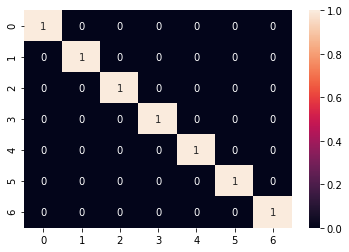

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

label_class = [j for j in label_index]

cm = confusion_matrix(y_true, y_pred, normalize="true")
sns.heatmap(cm, annot=True) #fmt='d'

In [ ]:
model.save("/content/drive/My Drive/Mammo_Model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Mammo_Model/assets


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        40

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



### VGG16

In [ ]:
base_model2 = tf.keras.applications.VGG16(
    include_top=False,input_shape=(192,192,3)
)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model2.trainable = False

In [ ]:
df.head()

REFNUM BG CLASS  ... RADIUS                                         path  CLASS_S
0  mdb001  G  CIRC  ...  197.0  /content/drive/My Drive/mias_jpg/mdb001.jpg   CIRC-B
1  mdb002  G  CIRC  ...   69.0  /content/drive/My Drive/mias_jpg/mdb002.jpg   CIRC-B
2  mdb003  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb003.jpg   NORM-N
3  mdb004  D  NORM  ...    NaN  /content/drive/My Drive/mias_jpg/mdb004.jpg   NORM-N
4  mdb005  F  CIRC  ...   30.0  /content/drive/My Drive/mias_jpg/mdb005.jpg   CIRC-B

[5 rows x 9 columns]

In [ ]:
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels_concat), activation="softmax")
])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)                6669      
Total params: 14,721,357
Trainable params: 6,669
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
initial_learning_rate2 = 0.001

lr_schedule2 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate2,
    decay_steps=1000,
    decay_rate=0.90,
    staircase=True)

In [ ]:
METRICS = [
      ##tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.SparseCategoricalAccuracy(),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tfa.metrics.F1Score(num_classes=len(labels)),
      #tfa.metrics.MultiLabelConfusionMatrix(num_classes=len(labels)),
      ]


model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule2),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = METRICS)

13

In [ ]:
history2 = model2.fit(train_set, epochs=60,validation_data=test_set)

Epoch 1/60
17/17 [==============================] - 6s 329ms/step - loss: 1.9445 - sparse_categorical_accuracy: 0.6326 - val_loss: 1.6544 - val_sparse_categorical_accuracy: 0.5909
Epoch 2/60
17/17 [==============================] - 4s 224ms/step - loss: 1.5286 - sparse_categorical_accuracy: 0.6288 - val_loss: 1.3193 - val_sparse_categorical_accuracy: 0.6667
Epoch 3/60
17/17 [==============================] - 4s 223ms/step - loss: 1.4366 - sparse_categorical_accuracy: 0.6136 - val_loss: 1.2507 - val_sparse_categorical_accuracy: 0.6818
Epoch 4/60
17/17 [==============================] - 4s 224ms/step - loss: 1.3962 - sparse_categorical_accuracy: 0.6136 - val_loss: 1.2317 - val_sparse_categorical_accuracy: 0.6818
Epoch 5/60
17/17 [==============================] - 4s 225ms/step - loss: 1.3643 - sparse_categorical_accuracy: 0.6250 - val_loss: 1.3550 - val_sparse_categorical_accuracy: 0.6364
Epoch 6/60
17/17 [==============================] - 4s 226ms/step - loss: 1.3473 - sparse_categorica

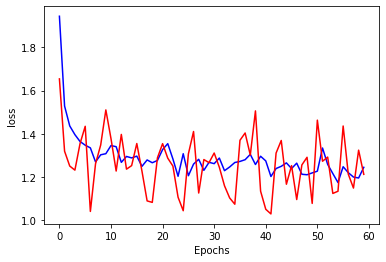

In [ ]:
plt.plot(history2.history["loss"], color="b")
plt.plot(history2.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

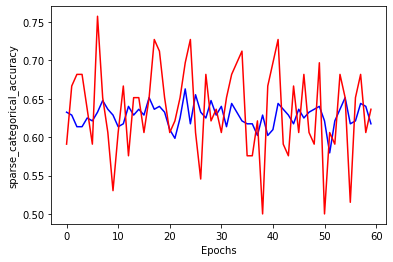

In [ ]:
plt.plot(history2.history["sparse_categorical_accuracy"], color="b")
plt.plot(history2.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

Pred : NORM
Truth : NORM


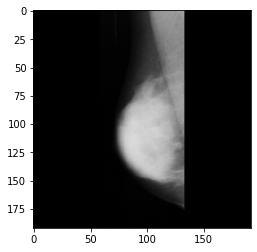

Pred : NORM
Truth : CALC


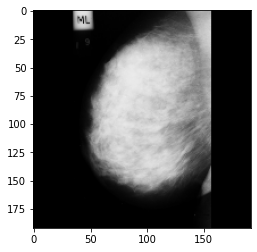

Pred : NORM
Truth : SPIC


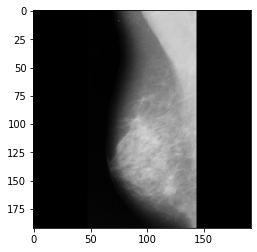

Pred : NORM
Truth : NORM


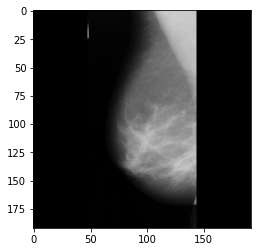

Pred : NORM
Truth : NORM


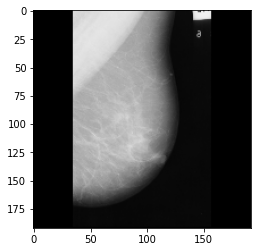

Pred : NORM
Truth : NORM


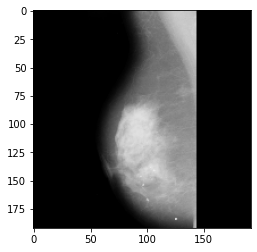

Pred : NORM
Truth : ARCH


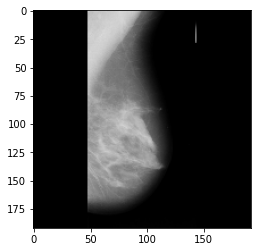

Pred : NORM
Truth : NORM


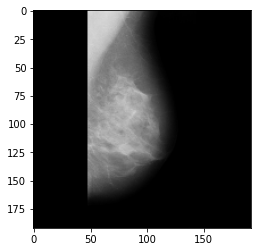

Pred : NORM
Truth : MISC


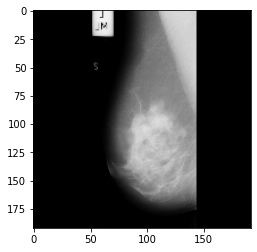

Pred : NORM
Truth : NORM


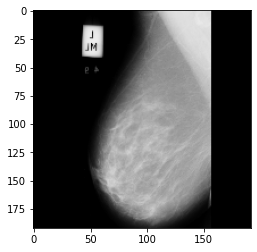

Pred : NORM
Truth : NORM


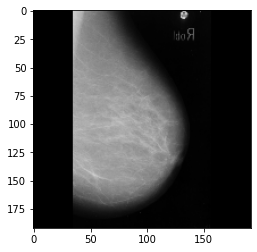

Pred : NORM
Truth : SPIC


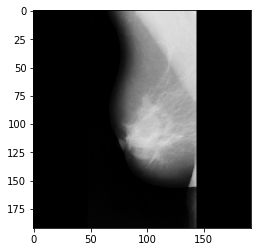

Pred : NORM
Truth : NORM


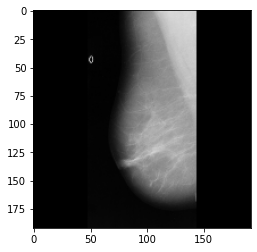

Pred : NORM
Truth : ASYM


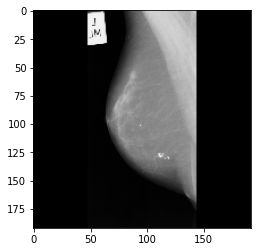

Pred : NORM
Truth : ASYM


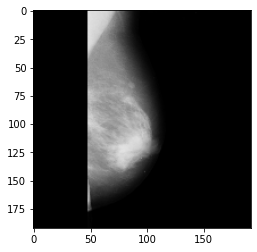

Pred : NORM
Truth : SPIC


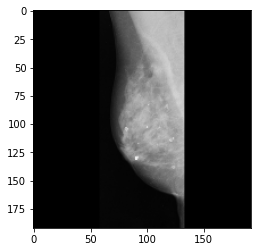

Pred : NORM
Truth : NORM


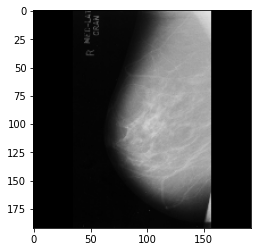

Pred : NORM
Truth : NORM


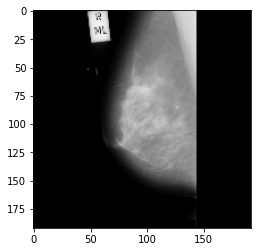

Pred : NORM
Truth : CIRC


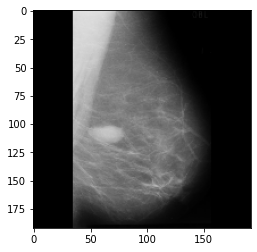

Pred : NORM
Truth : SPIC


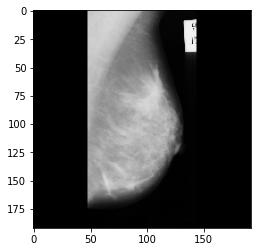

Pred : NORM
Truth : ASYM


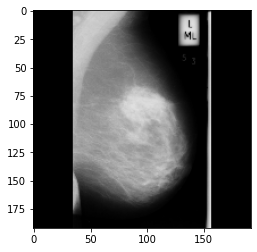

Pred : NORM
Truth : SPIC


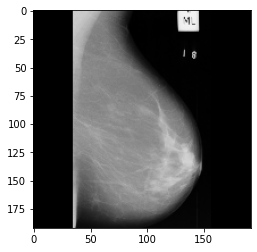

Pred : NORM
Truth : NORM


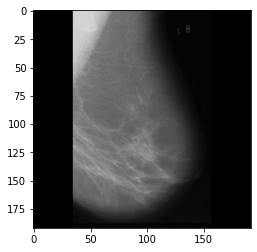

Pred : NORM
Truth : NORM


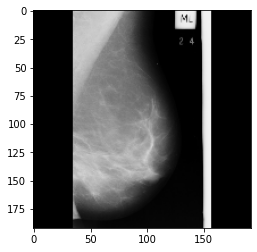

Pred : NORM
Truth : CIRC


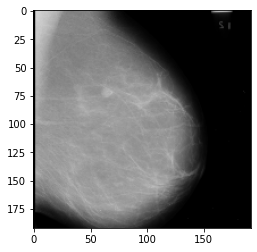

Pred : NORM
Truth : MISC


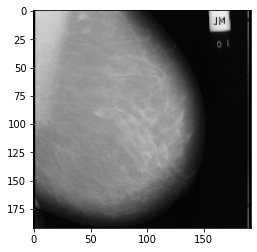

Pred : NORM
Truth : NORM


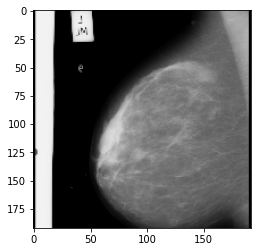

Pred : NORM
Truth : NORM


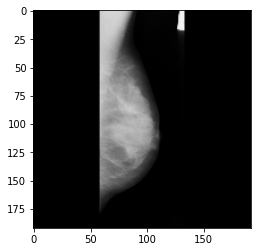

Pred : NORM
Truth : CIRC


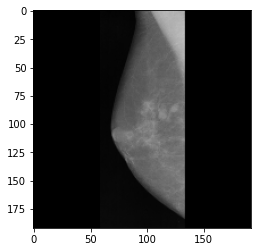

Pred : NORM
Truth : MISC


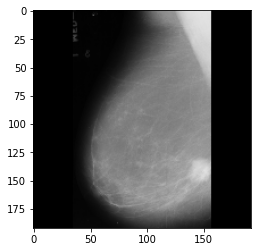

Pred : NORM
Truth : NORM


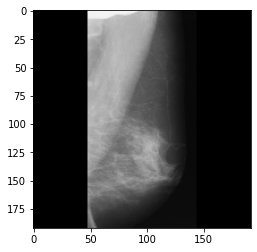

Pred : NORM
Truth : NORM


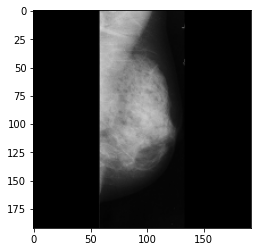

Pred : NORM
Truth : NORM


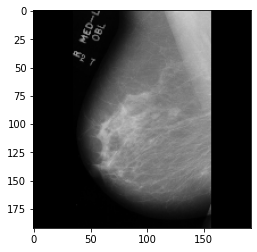

Pred : NORM
Truth : CALC


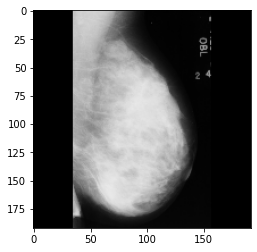

Pred : NORM
Truth : NORM


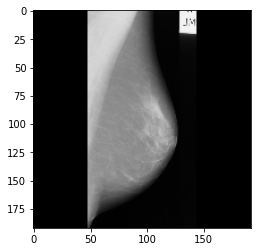

Pred : NORM
Truth : NORM


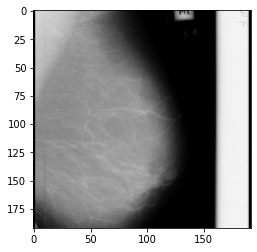

Pred : NORM
Truth : NORM


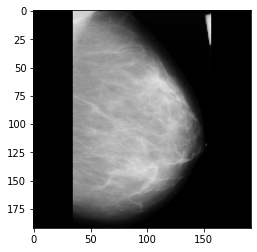

Pred : NORM
Truth : CALC


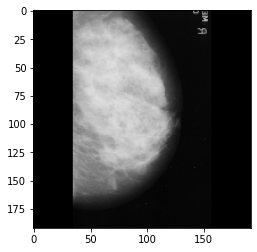

Pred : NORM
Truth : NORM


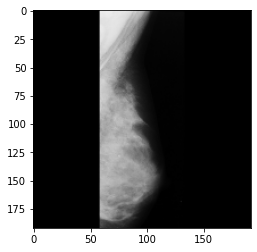

Pred : NORM
Truth : ASYM


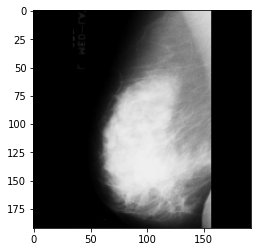

Pred : NORM
Truth : NORM


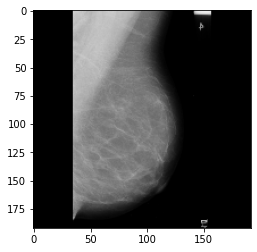

Pred : NORM
Truth : CALC


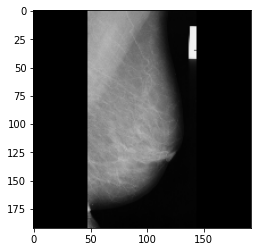

Pred : NORM
Truth : ARCH


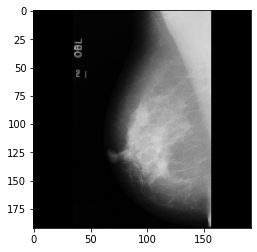

Pred : NORM
Truth : CIRC


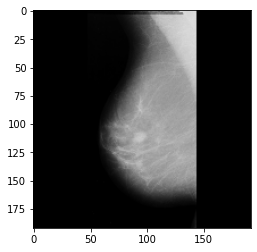

Pred : NORM
Truth : NORM


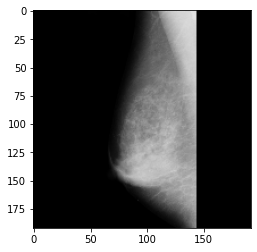

Pred : NORM
Truth : NORM


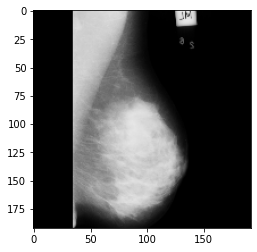

Pred : NORM
Truth : NORM


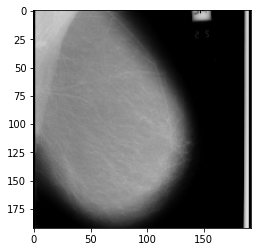

Pred : NORM
Truth : NORM


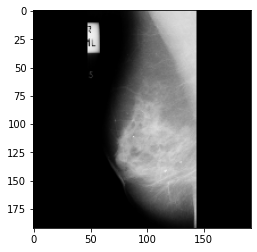

Pred : NORM
Truth : NORM


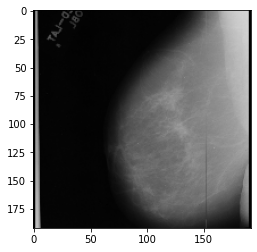

Pred : NORM
Truth : NORM


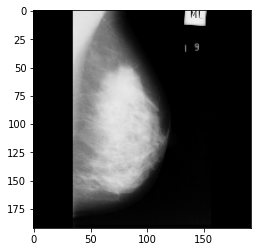

Pred : NORM
Truth : NORM


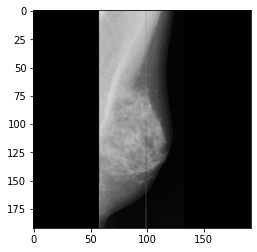

Pred : NORM
Truth : NORM


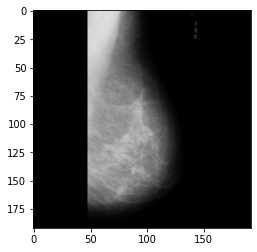

Pred : NORM
Truth : NORM


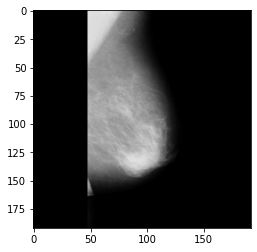

Pred : NORM
Truth : CIRC


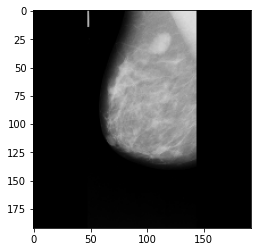

Pred : NORM
Truth : MISC


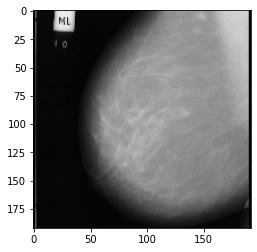

Pred : NORM
Truth : NORM


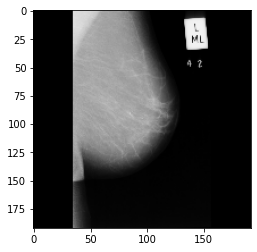

Pred : NORM
Truth : ARCH


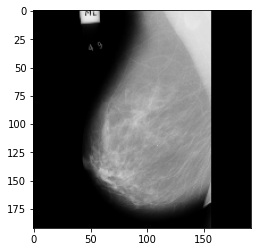

Pred : NORM
Truth : NORM


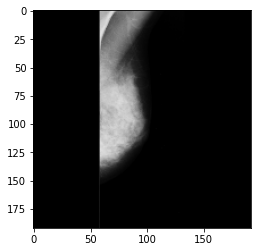

Pred : NORM
Truth : NORM


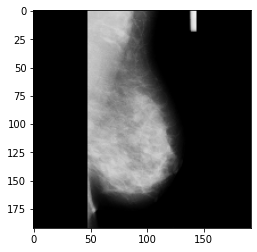

Pred : NORM
Truth : NORM


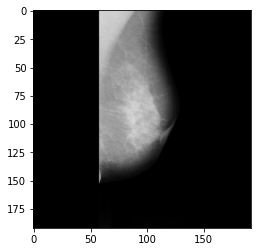

Pred : NORM
Truth : NORM


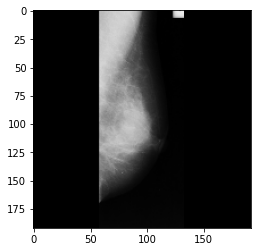

Pred : NORM
Truth : NORM


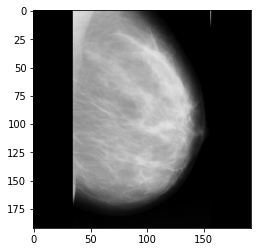

Pred : NORM
Truth : CALC


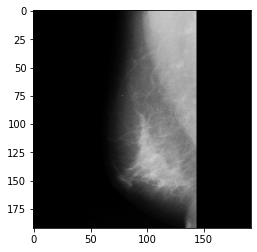

Pred : NORM
Truth : NORM


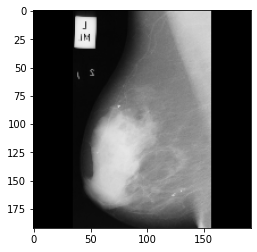

Pred : NORM
Truth : NORM


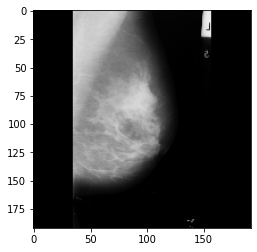

Pred : NORM
Truth : NORM


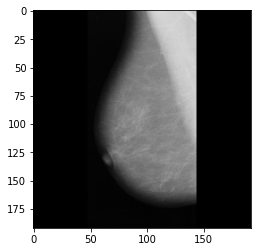

In [ ]:
for x, y in test_set.take(5):
  for i in range(len(y)):
    #y_pred = model.predict(x)
    y_pred2 = model2.predict_classes(x)
    print("Pred : {}\nTruth : {}".format(inv_label_index[y_pred2[i]], inv_label_index[y[i].numpy()])) 
    #print("Pred : {}\nTruth : {}".format(y_pred[i], y[i].numpy()))
    plt.imshow(x[i])
    plt.show()

In [ ]:
y_true2 = []
y_pred2 = []

for batch2, true_labels2 in test_set.take(10):
  y_true2 += [true_labels2.numpy()]
  y_pred2 += [(model2.predict_classes(batch2)).astype(np.int32)]

In [ ]:
y_true2 = []
y_pred2 = []

for batch2, true_labels2 in test_set.take(10):
  y_true2 += [true_labels2.numpy()]
  y_pred2 += [(model2.predict_classes(batch2)).astype(np.int32)]


y_true2 = tf.concat([batch for batch in y_true2], axis=0).numpy()
y_pred2 = tf.concat([batch for batch in y_pred2], axis=0).numpy()

from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true2, y_pred2))


In [ ]:
y_true2 = tf.concat([batch for batch in y_true2], axis=0).numpy()
y_pred2 = tf.concat([batch for batch in y_pred2], axis=0).numpy()

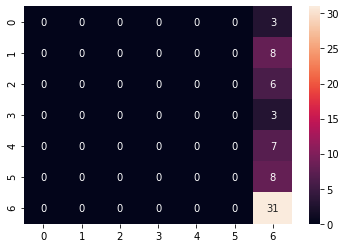

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
y_true2

array([6, 1, 1, 5, 4, 6, 6, 6, 6, 2, 0, 6, 1, 6, 4, 6, 6, 1, 2, 3, 4, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 1, 5, 6, 6, 5, 5, 6, 6,
       2, 4, 4, 6, 6, 2, 6, 1, 4, 4, 3, 2, 6, 2, 1, 6, 0, 0, 6, 3, 1, 5],
      dtype=int32)

In [ ]:
y_pred2

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int32)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true2, y_pred2))



Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.47      1.00      0.64        31

    accuracy                           0.47        66
   macro avg       0.07      0.14      0.09        66
weighted avg       0.22      0.47      0.30        66



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Improvement VGG Model

In [ ]:
initial_learning_rate2 = 0.005

lr_schedule2 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate2,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
class_weight = {}
effectif = dict(df["CLASS"].value_counts())
classes = label_index
for classe, index in classes.items():
  class_weight[index] = (len(df)/effectif[classe])/7

In [ ]:
class_weight

{0: 2.481203007518797,
 1: 1.8857142857142857,
 2: 3.142857142857143,
 3: 3.142857142857143,
 4: 2.481203007518797,
 5: 1.5714285714285714,
 6: 0.2277432712215321}

In [ ]:
history2 = model2.fit(train_set, epochs=60,validation_data=test_set,class_weight=class_weight)

Epoch 1/60
17/17 [==============================] - 4s 246ms/step - loss: 2.3043 - sparse_categorical_accuracy: 0.1629 - val_loss: 1.7906 - val_sparse_categorical_accuracy: 0.3939
Epoch 2/60
17/17 [==============================] - 4s 231ms/step - loss: 2.1760 - sparse_categorical_accuracy: 0.0758 - val_loss: 1.9958 - val_sparse_categorical_accuracy: 0.0758
Epoch 3/60
17/17 [==============================] - 4s 231ms/step - loss: 1.9434 - sparse_categorical_accuracy: 0.0909 - val_loss: 2.0416 - val_sparse_categorical_accuracy: 0.0758
Epoch 4/60
17/17 [==============================] - 4s 231ms/step - loss: 1.9176 - sparse_categorical_accuracy: 0.1250 - val_loss: 1.7373 - val_sparse_categorical_accuracy: 0.5758
Epoch 5/60
17/17 [==============================] - 4s 231ms/step - loss: 1.9406 - sparse_categorical_accuracy: 0.2235 - val_loss: 2.0259 - val_sparse_categorical_accuracy: 0.0606
Epoch 6/60
17/17 [==============================] - 4s 232ms/step - loss: 2.0331 - sparse_categorica

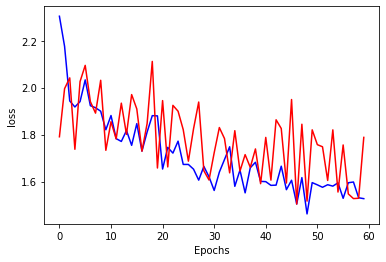

In [ ]:
plt.plot(history2.history["loss"], color="b")
plt.plot(history2.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

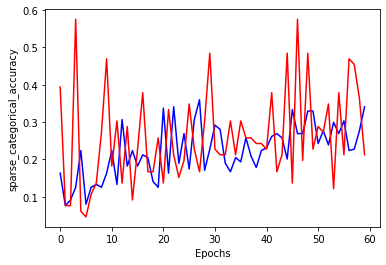

In [ ]:
plt.plot(history2.history["sparse_categorical_accuracy"], color="b")
plt.plot(history2.history["val_sparse_categorical_accuracy"], color="r")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [ ]:
y_true2 = []
y_pred2 = []

for batch2, true_labels2 in test_set.take(10):
  y_true2 += [true_labels2.numpy()]
  y_pred2 += [(model2.predict_classes(batch2)).astype(np.int32)]


y_true2 = tf.concat([batch for batch in y_true2], axis=0).numpy()
y_pred2 = tf.concat([batch for batch in y_pred2], axis=0).numpy()

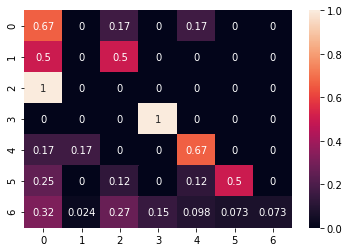

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true2, y_pred2,normalize="true")
sns.heatmap(cm, annot=True) #fmt='d'

In [ ]:

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true2, y_pred2))


Classification Report

              precision    recall  f1-score   support

           0       0.18      0.67      0.29         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.25      1.00      0.40         2
           4       0.40      0.67      0.50         6
           5       0.57      0.50      0.53         8
           6       1.00      0.07      0.14        41

    accuracy                           0.26        66
   macro avg       0.34      0.42      0.27        66
weighted avg       0.75      0.26      0.23        66



In [ ]:
class_name = {0:'SPIC'}

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true2, y_pred2))

In [ ]:
label_index

{'ARCH': 4, 'ASYM': 3, 'CALC': 5, 'CIRC': 1, 'MISC': 2, 'NORM': 6, 'SPIC': 0}

In [ ]:
inv_label_index.values()